# SHARE MARKET DATA ANALYSIS


The Nasdaq-100 is a stock market index comprised of 102 equity securities issued by 101 of the Nasdaq's largest nonfinancial companies. It includes sectors such as manufacturing, technology, retail, telecommunication, biotechnology, health care, transportation, media, and service providers.

The cluster trading strategy is used to build a diverse portfolio of investments. This method enables the identification of different company segments. One advantage of this analysis is that it can help to protect an investor's portfolio from risks.

Objective:

You must now create such segments so that customers can identify segments to invest in and segments to avoid. Use cluster analysis techniques to accomplish this task. You will also need to perform time-series forecasting for stock prices.

WEEK 1
1. Check the stock symbols of the companies in Nasdaq 100 Market cap.xlsx. Only the relevant
files in the NASDAQ_DATA folder should be read.
2. Append all files (imported in the previous step) that contain no more than 10 years of data.
For this, you may use your discretion.
3. Read Nasdaq 100 market cap.xlsx and nasdaq100_metrics_ratios.xlsx.
4. Collate the two files imported in the previous step to include the fields Market cap and Last
sale in addition to the various metrics and ratios already present in
nasdaq100_metrics_ratios.xlsx
5. Identify the variables whose variance is less than .005 (as these do not contribute to model
building), and eliminate those variables
6. Delete the variables in nasdaq100_metrics_ratios.xlsx where 30% or more of the values are
missing

MACHINE LEARNING 

1. Perform PCA to reduce the number of variables in the data
2. After PCA, perform cluster analysis to identify cohorts, define these cohorts (cluster
profiling), and specify the insights found
3. Highlight companies from different sectors falling into the same cohort, and share your
findings
4. Plot seasonality, trend, and irregular components over time for the historical stock price of
Apple
5. Based on trend and seasonality, choose an appropriate exponential smoothing method to
forecast the weekend share price value for the next 12 months
6. Perform an augmented Dickey–Fuller test (ADF) to check for the stationarity of Apple stock.
7. Analyze the ACF and PACF plots for Apple's historical stock prices, strategize for ARIMA
modeling, determine the appropriate values of p, d, and q, and forecast the month-end
share price value for the next 12 months
8. Find the mean absolute percentage error (MAPE) for a 12-month period to validate the
model
9. Identify the top 2 companies from each sector based on market capitalization, create trend
charts for the month-end share price for the last five years (using the variable "adjusted
close"), display the 12-month rolling mean and standard deviation in the same chart, and
share your observations regarding the stationarity of all companies
10. Conduct an ADF test to verify the stationarity of the companies selected in the previous step
11. Perform batch forecasting for the top 2 companies from each sector based on market
capitalization for the weekend share price value for the next 12 months using Auto ARIMA,
and find the MAPE for a 12-month period to validate the model

EXCEL

1. Create an Excel dashboard showcasing the following:
Hint: Use form controls to create a dynamic chart
a. Trend charts of share prices of the top company in each sector based on market
capitalization for the past three months
b. The market capitalization and sub industry of the companies in the dashboard
2. Create a graph to compare yoy_revenue_growth_latest for different companies in various
industries

SQL

1. Determine the market capitalization of the company in the IT sector (from Nasdaq 100) with
the greatest LastSale value
2. Find the number of companies from each industry in the Nasdaq 100 Market cap.xlsx
3. List the top 5 companies based on market capitalization
4. Create a table with sectors and subsectors showcasing the count of companies in each
subsector


In [83]:
import os 
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings 
warnings.filterwarnings("ignore")

In [91]:
nasdaq_cap = pd.read_excel("C:\\Users\\saisa\\Downloads\\Datasets (1)\\Capstone_2\\Nasdaq 100 Market cap.xlsx")

In [92]:
nasdaq_metrics = pd.read_excel("C:\\Users\\saisa\\Downloads\\Datasets (1)\\Capstone_2\\nasdaq100_metrics_ratios.xlsx")

In [93]:
nasdaq_cap

Symbol                             Name     Market Cap Last Sale  \
0     AAPL                       Apple Inc.  2625740143000   $151.45   
1     ABNB                     Airbnb, Inc.    69569944167   $116.65   
2     ADBE                       Adobe Inc.   149144569000   $320.81   
3      ADI             Analog Devices, Inc.    75484763090   $146.76   
4      ADP  Automatic Data Processing, Inc.    98332762096   $236.78   
..     ...                              ...            ...       ...   
97     WBA   Walgreens Boots Alliance, Inc.    30450068934    $35.21   
98    WDAY                    Workday, Inc.    39549440000   $154.49   
99     XEL                 Xcel Energy Inc.    34192428038    $62.51   
100     ZM  Zoom Video Communications, Inc.    24659899766    $82.85   
101     ZS                    Zscaler, Inc.    22393436472   $156.54   

    Net Change  Percentage Change  
0        $2.00             0.0134  
1        $0.26             0.0022  
2        $4.59             0.0145  
3        $2.23             0.0154  
4        $0.13            -0.0005  
..         ...                ...  
97       $0.52             0.0150  
98       $6.54             0.0442  
99       $0.93             0.0151  
100      $2.24             0.0278  
101      $7.87             0.0529  

[102 rows x 6 columns]

In [94]:
nasdaq_cap.Symbol

0      AAPL
1      ABNB
2      ADBE
3       ADI
4       ADP
       ... 
97      WBA
98     WDAY
99      XEL
100      ZM
101      ZS
Name: Symbol, Length: 102, dtype: object

In [6]:
def filteredcompany(data):
    str1 = "C:\\Users\\saisa\\Desktop\\NASDAQ_DATA\\"
    str2 = ".csv"
    total_df =str1+data+str2
    print(total_df)
    dataset = pd.read_csv(total_df)
    print(dataset)

In [7]:
for companies in nasdaq_cap.Symbol:
    filteredcompany(companies)
    

C:\Users\saisa\Desktop\NASDAQ_DATA\AAPL.csv
            Date        High         Low        Open       Close       Volume  \
0     1999-12-31    0.918527    0.888393    0.901228    0.917969  163811200.0   
1     2000-01-03    1.004464    0.907924    0.936384    0.999442  535796800.0   
2     2000-01-04    0.987723    0.903460    0.966518    0.915179  512377600.0   
3     2000-01-05    0.987165    0.919643    0.926339    0.928571  778321600.0   
4     2000-01-06    0.955357    0.848214    0.947545    0.848214  767972800.0   
...          ...         ...         ...         ...         ...          ...   
5740  2022-10-24  150.229996  146.000000  147.190002  149.449997   75981900.0   
5741  2022-10-25  152.490005  149.360001  150.089996  152.339996   74732300.0   
5742  2022-10-26  151.990005  148.039993  150.960007  149.350006   88194300.0   
5743  2022-10-27  149.050003  144.130005  148.070007  144.800003  109180200.0   
5744  2022-10-28  157.500000  147.820007  148.199997  155.740005 

In [8]:
file_count = 0
list_files = []
abs_files = []
for file_name in nasdaq_cap.Symbol:
    try :
        file_path ="C:\\Users\\saisa\\Desktop\\NASDAQ_DATA\\" + file_name +'.csv'
        temp_file = pd.read_csv(file_path)
        temp_file.insert(loc = 0, column = 'Symbol', value = file_name)
        temp_file.Date = pd.to_datetime(temp_file.Date, infer_datetime_format = True)
        list_files.append(temp_file)
    except :
        abs_files.append(file_name)
        continue

In [9]:
final_data = pd.concat(list_files)

In [10]:
final_data.columns

Index(['Symbol', 'Date', 'High', 'Low', 'Open', 'Close', 'Volume',
       'Adj Close'],
      dtype='object')

In [11]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 474247 entries, 0 to 1164
Data columns (total 8 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Symbol     474247 non-null  object        
 1   Date       474247 non-null  datetime64[ns]
 2   High       474247 non-null  float64       
 3   Low        474247 non-null  float64       
 4   Open       474247 non-null  float64       
 5   Close      474247 non-null  float64       
 6   Volume     474247 non-null  float64       
 7   Adj Close  474247 non-null  float64       
dtypes: datetime64[ns](1), float64(6), object(1)
memory usage: 32.6+ MB


In [12]:
min_max_date = final_data.groupby('Symbol')['Date'].agg([min, max])
min_max_date

min        max
Symbol                      
AAPL   1999-12-31 2022-10-28
ABNB   2020-12-10 2022-10-28
ADBE   1999-12-31 2022-10-28
ADI    1999-12-31 2022-10-28
ADP    1999-12-31 2022-10-28
...           ...        ...
WBA    1999-12-31 2022-10-28
WDAY   2012-10-12 2022-10-28
XEL    1999-12-31 2022-10-28
ZM     2019-04-18 2022-10-28
ZS     2018-03-16 2022-10-28

[102 rows x 2 columns]

In [13]:
import datetime as dt

In [14]:
start = dt.datetime(2002, 11, 1)
start

datetime.datetime(2002, 11, 1, 0, 0)

In [15]:
end = dt.datetime(2022, 10, 24)

In [16]:
final_data.shape

(474247, 8)

In [17]:
final_data.describe(datetime_is_numeric = True)

Date           High            Low  \
count                         474247  474247.000000  474247.000000   
mean   2012-05-02 11:42:51.118425600      78.122040      75.990176   
min              1999-12-31 00:00:00       0.032000       0.025500   
25%              2006-11-03 00:00:00      16.683626      16.100000   
50%              2012-10-10 00:00:00      36.349998      35.389999   
75%              2018-01-24 00:00:00      76.440002      74.510002   
max              2022-10-28 00:00:00    2715.659912    2632.219971   
std                              NaN     158.651773     154.511824   

                Open          Close        Volume      Adj Close  
count  474247.000000  474247.000000  4.742470e+05  474247.000000  
mean       77.074417      77.076235  1.843704e+07      73.076970  
min         0.027500       0.026500  0.000000e+00       0.022405  
25%        16.389999      16.391222  1.581600e+06      13.235787  
50%        35.880001      35.889999  3.579800e+06      29.216110  
75%        75.480003      75.500000  1.046985e+07      70.079777  
max      2680.000000    2703.260010  7.421641e+09    2703.260010  
std       156.644407     156.581800  7.172834e+07     156.939467

In [18]:
final_data[(final_data.Date >= start) & (final_data.Date <= end)].groupby('Symbol').size().sort_values()

Symbol
CEG      193
ABNB     471
LCID     529
DDOG     781
CRWD     850
        ... 
GILD    5029
FISV    5029
FAST    5029
INTU    5029
AAPL    5029
Length: 102, dtype: int64

In [19]:
final_data = final_data[(final_data.Date >= start) & (final_data.Date <= end)]

In [20]:
final_data

Symbol       Date        High         Low        Open       Close  \
712    AAPL 2002-11-01    0.294643    0.283750    0.284643    0.292143   
713    AAPL 2002-11-04    0.310357    0.291964    0.294643    0.301607   
714    AAPL 2002-11-05    0.302857    0.291964    0.299107    0.301786   
715    AAPL 2002-11-06    0.309286    0.298214    0.305000    0.307500   
716    AAPL 2002-11-07    0.305357    0.282321    0.302500    0.285714   
...     ...        ...         ...         ...         ...         ...   
1156     ZS 2022-10-18  152.500000  146.679993  151.100006  149.690002   
1157     ZS 2022-10-19  151.210007  146.000000  147.910004  148.770004   
1158     ZS 2022-10-20  154.880005  148.848999  149.279999  150.229996   
1159     ZS 2022-10-21  150.919998  142.710007  148.979996  150.479996   
1160     ZS 2022-10-24  151.460007  144.300003  151.360001  148.669998   

           Volume   Adj Close  
712   189828800.0    0.249028  
713   376818400.0    0.257095  
714   210694400.0    0.257248  
715   216389600.0    0.262119  
716   336179200.0    0.243548  
...           ...         ...  
1156    2059400.0  149.690002  
1157    1594500.0  148.770004  
1158    1709500.0  150.229996  
1159    2140900.0  150.479996  
1160    1375200.0  148.669998  

[426759 rows x 8 columns]

In [21]:
final_data.reset_index(drop = True, inplace = True)

In [22]:
final_data.head()

Symbol       Date      High       Low      Open     Close       Volume  \
0   AAPL 2002-11-01  0.294643  0.283750  0.284643  0.292143  189828800.0   
1   AAPL 2002-11-04  0.310357  0.291964  0.294643  0.301607  376818400.0   
2   AAPL 2002-11-05  0.302857  0.291964  0.299107  0.301786  210694400.0   
3   AAPL 2002-11-06  0.309286  0.298214  0.305000  0.307500  216389600.0   
4   AAPL 2002-11-07  0.305357  0.282321  0.302500  0.285714  336179200.0   

   Adj Close  
0   0.249028  
1   0.257095  
2   0.257248  
3   0.262119  
4   0.243548

In [23]:
final_data.tail()

Symbol       Date        High         Low        Open       Close  \
426754     ZS 2022-10-18  152.500000  146.679993  151.100006  149.690002   
426755     ZS 2022-10-19  151.210007  146.000000  147.910004  148.770004   
426756     ZS 2022-10-20  154.880005  148.848999  149.279999  150.229996   
426757     ZS 2022-10-21  150.919998  142.710007  148.979996  150.479996   
426758     ZS 2022-10-24  151.460007  144.300003  151.360001  148.669998   

           Volume   Adj Close  
426754  2059400.0  149.690002  
426755  1594500.0  148.770004  
426756  1709500.0  150.229996  
426757  2140900.0  150.479996  
426758  1375200.0  148.669998

In [24]:
final_data.shape

(426759, 8)

In [25]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426759 entries, 0 to 426758
Data columns (total 8 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Symbol     426759 non-null  object        
 1   Date       426759 non-null  datetime64[ns]
 2   High       426759 non-null  float64       
 3   Low        426759 non-null  float64       
 4   Open       426759 non-null  float64       
 5   Close      426759 non-null  float64       
 6   Volume     426759 non-null  float64       
 7   Adj Close  426759 non-null  float64       
dtypes: datetime64[ns](1), float64(6), object(1)
memory usage: 26.0+ MB


In [26]:
final_data.describe()

High            Low           Open          Close  \
count  426759.000000  426759.000000  426759.000000  426759.000000   
mean       84.071710      81.852422      82.980670      82.984610   
std       165.664963     161.348897     163.574363     163.505306   
min         0.076667       0.050000       0.073125       0.060000   
25%        18.680000      18.129999      18.400000      18.411877   
50%        39.115002      38.182449      38.650002      38.660000   
75%        83.639999      81.709999      82.699997      82.704998   
max      2715.659912    2632.219971    2680.000000    2703.260010   

             Volume      Adj Close  
count  4.267590e+05  426759.000000  
mean   1.835207e+07      79.126310  
std    7.168442e+07     163.882337  
min    0.000000e+00       0.053522  
25%    1.619800e+06      14.812639  
50%    3.593200e+06      33.065598  
75%    1.054645e+07      78.172791  
max    3.372970e+09    2703.260010

In [27]:
collated_data = pd.merge(nasdaq_cap, nasdaq_metrics, on=["Symbol"], how="inner")

In [28]:
collated_data

Symbol                             Name     Market Cap Last Sale  \
0     AAPL                       Apple Inc.  2625740143000   $151.45   
1     ABNB                     Airbnb, Inc.    69569944167   $116.65   
2     ADBE                       Adobe Inc.   149144569000   $320.81   
3      ADI             Analog Devices, Inc.    75484763090   $146.76   
4      ADP  Automatic Data Processing, Inc.    98332762096   $236.78   
..     ...                              ...            ...       ...   
97     WBA   Walgreens Boots Alliance, Inc.    30450068934    $35.21   
98    WDAY                    Workday, Inc.    39549440000   $154.49   
99     XEL                 Xcel Energy Inc.    34192428038    $62.51   
100     ZM  Zoom Video Communications, Inc.    24659899766    $82.85   
101     ZS                    Zscaler, Inc.    22393436472   $156.54   

    Net Change  Percentage Change                    company  \
0        $2.00             0.0134                 Apple Inc.   
1        $0.26             0.0022                     Airbnb   
2        $4.59             0.0145                 Adobe Inc.   
3        $2.23             0.0154             Analog Devices   
4        $0.13            -0.0005                        ADP   
..         ...                ...                        ...   
97       $0.52             0.0150   Walgreens Boots Alliance   
98       $6.54             0.0442              Workday, Inc.   
99       $0.93             0.0151                Xcel Energy   
100      $2.24             0.0278  Zoom Video Communications   
101      $7.87             0.0529                    Zscaler   

                     sector                                   subsector  \
0    Information Technology  Technology Hardware, Storage & Peripherals   
1    Consumer Discretionary          Internet & Direct Marketing Retail   
2    Information Technology                        Application Software   
3    Information Technology                              Semiconductors   
4    Information Technology       Data Processing & Outsourced Services   
..                      ...                                         ...   
97         Consumer Staples                                 Drug Retail   
98   Information Technology                        Application Software   
99                Utilities                             Multi-Utilities   
100  Information Technology                        Application Software   
101  Information Technology                        Application Software   

     asset_turnover_2017  ...  yoy_eps_growth_2021  yoy_eps_growth_2022  \
0                   0.66  ...                71.04                  NaN   
1                    NaN  ...                96.46                  NaN   
2                   0.54  ...                -7.48                  NaN   
3                   0.36  ...                 5.49                  NaN   
4                    NaN  ...                 6.49                15.32   
..                   ...  ...                  ...                  ...   
97                  1.71  ...               463.46                  NaN   
98                   NaN  ...                43.87               110.08   
99                  0.27  ...                 6.09                  NaN   
100                  NaN  ...                  NaN               100.00   
101                  NaN  ...              -116.85               -43.52   

     yoy_eps_growth_latest  yoy_revenue_growth_2017  yoy_revenue_growth_2018  \
0                    -7.69                    11.34                    21.69   
1                   609.09                      NaN                    40.08   
2                    -3.97                    25.51                    24.45   
3                     6.67                    36.64                    10.91   
4                    19.05                      NaN                     8.65   
..                     ...                      ...                      ...   
97      

In [29]:
collated_data.head()

Symbol                             Name     Market Cap Last Sale Net Change  \
0   AAPL                       Apple Inc.  2625740143000   $151.45      $2.00   
1   ABNB                     Airbnb, Inc.    69569944167   $116.65      $0.26   
2   ADBE                       Adobe Inc.   149144569000   $320.81      $4.59   
3    ADI             Analog Devices, Inc.    75484763090   $146.76      $2.23   
4    ADP  Automatic Data Processing, Inc.    98332762096   $236.78      $0.13   

   Percentage Change         company                  sector  \
0             0.0134      Apple Inc.  Information Technology   
1             0.0022          Airbnb  Consumer Discretionary   
2             0.0145      Adobe Inc.  Information Technology   
3             0.0154  Analog Devices  Information Technology   
4            -0.0005             ADP  Information Technology   

                                    subsector  asset_turnover_2017  ...  \
0  Technology Hardware, Storage & Peripherals                 0.66  ...   
1          Internet & Direct Marketing Retail                  NaN  ...   
2                        Application Software                 0.54  ...   
3                              Semiconductors                 0.36  ...   
4       Data Processing & Outsourced Services                  NaN  ...   

   yoy_eps_growth_2021  yoy_eps_growth_2022  yoy_eps_growth_latest  \
0                71.04                  NaN                  -7.69   
1                96.46                  NaN                 609.09   
2                -7.48                  NaN                  -3.97   
3                 5.49                  NaN                   6.67   
4                 6.49                15.32                  19.05   

   yoy_revenue_growth_2017  yoy_revenue_growth_2018  yoy_revenue_growth_2019  \
0                    11.34                    21.69                     5.36   
1                      NaN                    40.08                    31.58   
2                    25.51                    24.45                    25.21   
3                    36.64                    10.91                    -3.22   
4                      NaN                     8.65                     7.16   

   yoy_revenue_growth_2020  yoy_revenue_growth_2021  yoy_revenue_growth_2022  \
0                    11.94                    38.50                      NaN   
1                    31.27                   -18.11                      NaN   
2                    16.86                    23.69                      NaN   
3                    -6.25                    21.07                      NaN   
4                     4.84                     4.95                    11.87   

   yoy_revenue_growth_latest  
0                       5.11  
1                      41.00  
2                      15.54  
3                      26.30  
4                      12.02  

[5 rows x 288 columns]

In [30]:
collated_data.tail()

Symbol                             Name   Market Cap Last Sale Net Change  \
97     WBA   Walgreens Boots Alliance, Inc.  30450068934    $35.21      $0.52   
98    WDAY                    Workday, Inc.  39549440000   $154.49      $6.54   
99     XEL                 Xcel Energy Inc.  34192428038    $62.51      $0.93   
100     ZM  Zoom Video Communications, Inc.  24659899766    $82.85      $2.24   
101     ZS                    Zscaler, Inc.  22393436472   $156.54      $7.87   

     Percentage Change                    company                  sector  \
97              0.0150   Walgreens Boots Alliance        Consumer Staples   
98              0.0442              Workday, Inc.  Information Technology   
99              0.0151                Xcel Energy               Utilities   
100             0.0278  Zoom Video Communications  Information Technology   
101             0.0529                    Zscaler  Information Technology   

                subsector  asset_turnover_2017  ...  yoy_eps_growth_2021  \
97            Drug Retail                 1.71  ...               463.46   
98   Application Software                  NaN  ...                43.87   
99        Multi-Utilities                 0.27  ...                 6.09   
100  Application Software                  NaN  ...                  NaN   
101  Application Software                  NaN  ...              -116.85   

     yoy_eps_growth_2022  yoy_eps_growth_latest  yoy_revenue_growth_2017  \
97                   NaN                 -76.09                     1.91   
98                110.08                -160.98                      NaN   
99                   NaN                   3.45                     2.68   
100               100.00                 -85.58                      NaN   
101               -43.52                 -16.95                      NaN   

     yoy_revenue_growth_2018  yoy_revenue_growth_2019  \
97                     20.61                    -1.65   
98                     29.85                    26.22   
99                      0.77                    -1.80   
100                   149.56                   118.09   
101                   145.42                   -17.67   

     yoy_revenue_growth_2020  yoy_revenue_growth_2021  \
97                      6.57                    10.37   
98                     22.65                    14.10   
99                     -1.54                    13.93   
100                    99.11                   263.13   
101                    36.07                    48.79   

     yoy_revenue_growth_2022  yoy_revenue_growth_latest  
97                       NaN                      -4.02  
98                     11.04                      24.57  
99                       NaN                      10.17  
100                    50.75                       7.16  
101                    56.05                      56.22  

[5 rows x 288 columns]

In [31]:
collated_data.shape

(102, 288)

In [32]:
collated_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102 entries, 0 to 101
Columns: 288 entries, Symbol to yoy_revenue_growth_latest
dtypes: float64(278), int64(3), object(7)
memory usage: 230.3+ KB


In [33]:
collated_data.describe()

Market Cap  Percentage Change  asset_turnover_2017  \
count  1.020000e+02         102.000000            73.000000   
mean   1.559159e+11           0.020855             0.724932   
std    3.777520e+11           0.020055             0.529098   
min    8.980286e+09          -0.041700             0.140000   
25%    3.260737e+10           0.007200             0.400000   
50%    4.836661e+10           0.017150             0.600000   
75%    9.950980e+10           0.035150             0.850000   
max    2.625740e+12           0.079300             3.710000   

       asset_turnover_2018  asset_turnover_2019  asset_turnover_2020  \
count           100.000000           101.000000           101.000000   
mean              0.746400             0.715842             0.653762   
std               0.521082             0.507563             0.457665   
min               0.080000             0.030000             0.060000   
25%               0.430000             0.410000             0.400000   
50%               0.605000             0.580000             0.540000   
75%               0.885000             0.810000             0.730000   
max               3.670000             3.540000             3.300000   

       asset_turnover_2021  asset_turnover_2022  asset_turnover_latest  \
count           102.000000            26.000000             102.000000   
mean              0.675980             0.674231               0.171667   
std               0.440727             0.323483               0.108938   
min               0.010000             0.210000               0.010000   
25%               0.410000             0.467500               0.110000   
50%               0.560000             0.560000               0.145000   
75%               0.817500             0.847500               0.210000   
max               3.410000             1.440000               0.830000   

       buyback_yield_2017  ...  yoy_eps_growth_2021  yoy_eps_growth_2022  \
count           61.000000  ...            94.000000            25.000000   
mean             2.035574  ...            52.306596            19.030000   
std              2.842860  ...           159.907597            83.414674   
min             -4.250000  ...          -209.790000          -174.160000   
25%              0.500000  ...            -5.330000            -3.830000   
50%              1.080000  ...            24.850000            15.320000   
75%              2.600000  ...            60.692500            63.950000   
max             14.620000  ...           966.670000           249.230000   

       yoy_eps_growth_latest  yoy_revenue_growth_2017  \
count             102.000000                72.000000   
mean               43.908627                19.277917   
std               206.342294                32.766094   
min              -369.840000               -11.550000   
25%               -31.965000                 5.987500   
50%                 7.205000                13.085000   
75%                45.437500                21.867500   
max              1150.000000               261.180000   

       yoy_revenue_growth_2018  yoy_revenue_growth_2019  \
count               100.000000               101.000000   
mean                 28.662700                13.490099   
std                  78.640275                26.580093   
min                 -81.470000               -90.400000   
25%                   7.930000                 3.280000   
50%                  15.575000                10.300000   
75%                  23.470000                21.280000   
max                 736.480000               137.710000   

       yoy_revenue_growth_2020  yoy_revenue_growth_2021  \
count               102.000000               100.000000   
mean                 17.138039                24.130200   
std                  46.183930                31.317221   
min                 -52.320000               -27.540000   
25%                   2.617500                10.325000   
50%                   9.075000          

In [34]:
collated_data.var()

Market Cap                   1.426966e+23
Percentage Change            4.021979e-04
asset_turnover_2017          2.799448e-01
asset_turnover_2018          2.715263e-01
asset_turnover_2019          2.576205e-01
                                 ...     
yoy_revenue_growth_2019      7.065013e+02
yoy_revenue_growth_2020      2.132955e+03
yoy_revenue_growth_2021      9.807684e+02
yoy_revenue_growth_2022      2.663613e+02
yoy_revenue_growth_latest    3.691039e+02
Length: 281, dtype: float64

In [35]:
var_data = collated_data.var(numeric_only= True).sort_values(ascending= True)
cols = var_data[var_data < 0.005].index
cols

Index(['Percentage Change', 'capex_to_revenue_2022',
       'inventory_to_revenue_2022', 'inventory_to_revenue_2018',
       'inventory_to_revenue_2017'],
      dtype='object')

In [36]:
collated_data.drop(columns = cols, inplace = True)

In [37]:
collated_data.shape

(102, 283)

In [38]:
missing_perc = collated_data.isna().sum() /collated_data.shape[0]*100
missing_perc.sort_values(ascending = False)

goodwill_to_asset_latest            100.000000
inventory_turnover_2022              88.235294
days_inventory_2022                  88.235294
price_earnings_growth_ratio_2022     87.254902
interest_coverage_2022               85.294118
                                       ...    
equity_to_assets_2021                 0.000000
equity_to_assets_2020                 0.000000
effective_interest_rate_latest        0.000000
e10_latest                            0.000000
yoy_revenue_growth_latest             0.000000
Length: 283, dtype: float64

In [39]:
collated_data.drop(columns = missing_perc[missing_perc >30].index, inplace = True)

In [40]:
collated_data.shape

(102, 203)

In [41]:
collated_data.columns

Index(['Symbol', 'Name', 'Market Cap', 'Last Sale', 'Net Change', 'company',
       'sector', 'subsector', 'asset_turnover_2017', 'asset_turnover_2018',
       ...
       'yoy_eps_growth_2019', 'yoy_eps_growth_2020', 'yoy_eps_growth_2021',
       'yoy_eps_growth_latest', 'yoy_revenue_growth_2017',
       'yoy_revenue_growth_2018', 'yoy_revenue_growth_2019',
       'yoy_revenue_growth_2020', 'yoy_revenue_growth_2021',
       'yoy_revenue_growth_latest'],
      dtype='object', length=203)

In [42]:
collated_data = collated_data.drop(["Name", "Net Change"], axis=1)

In [43]:
collated_data

Symbol     Market Cap Last Sale                    company  \
0     AAPL  2625740143000   $151.45                 Apple Inc.   
1     ABNB    69569944167   $116.65                     Airbnb   
2     ADBE   149144569000   $320.81                 Adobe Inc.   
3      ADI    75484763090   $146.76             Analog Devices   
4      ADP    98332762096   $236.78                        ADP   
..     ...            ...       ...                        ...   
97     WBA    30450068934    $35.21   Walgreens Boots Alliance   
98    WDAY    39549440000   $154.49              Workday, Inc.   
99     XEL    34192428038    $62.51                Xcel Energy   
100     ZM    24659899766    $82.85  Zoom Video Communications   
101     ZS    22393436472   $156.54                    Zscaler   

                     sector                                   subsector  \
0    Information Technology  Technology Hardware, Storage & Peripherals   
1    Consumer Discretionary          Internet & Direct Marketing Retail   
2    Information Technology                        Application Software   
3    Information Technology                              Semiconductors   
4    Information Technology       Data Processing & Outsourced Services   
..                      ...                                         ...   
97         Consumer Staples                                 Drug Retail   
98   Information Technology                        Application Software   
99                Utilities                             Multi-Utilities   
100  Information Technology                        Application Software   
101  Information Technology                        Application Software   

     asset_turnover_2017  asset_turnover_2018  asset_turnover_2019  \
0                   0.66                 0.72                 0.74   
1                    NaN                 0.55                 0.64   
2                   0.54                 0.54                 0.57   
3                   0.36                 0.30                 0.29   
4                    NaN                 0.34                 0.34   
..                   ...                  ...                  ...   
97                  1.71                 1.96                 1.77   
98                   NaN                 0.52                 0.54   
99                  0.27                 0.26                 0.24   
100                  NaN                 0.70                 1.16   
101                  NaN                 0.60                 0.58   

     asset_turnover_2020  ...  yoy_eps_growth_2019  yoy_eps_growth_2020  \
0                   0.83  ...                -0.34                10.44   
1                   0.36  ...                  NaN                  NaN   
2                   0.57  ...                15.38                80.50   
3                   0.26  ...                -8.75               -10.14   
4                   0.35  ...                23.29                 8.78   
..                   ...  ...                  ...                  ...   
97                  1.58  ...               -14.65               -87.94   
98                  0.59  ...               -24.52                -9.84   
99                  0.22  ...                 6.88                 5.68   
100                 0.76  ...               185.71               200.00   
101                 0.35  ...                63.49              -286.96   

     yoy_eps_growth_2021  yoy_eps_growth_latest  yoy_revenue_growth_2017  \
0                  71.04                  -7.69                    11.34   
1                  96.46                 609.09                      NaN   
2                  -7.48                  -3.97                    25.51   
3                   5.49                   6.67                    36.64   
4                   6.49                  19.05                      NaN   
..                   ...                    ...                      ...   
97                463.46            

In [45]:
collated_data.isna().sum().sort_values(ascending = False)

interest_coverage_2018                30
yoy_ebitda_growth_2017                30
scaled_net_operating_assets_2017      30
price_earnings_growth_ratio_latest    30
yoy_revenue_growth_2017               30
                                      ..
equity_to_assets_latest                0
equity_to_assets_2021                  0
equity_to_assets_2020                  0
effective_interest_rate_latest         0
yoy_revenue_growth_latest              0
Length: 201, dtype: int64

In [49]:
collated_data_1 = collated_data.copy()

In [50]:
missing_cals = collated_data_1.isna().sum()
msng_cols = missing_cals[missing_cals > 0].sort_values(ascending = False).index.tolist()
msng_cols1 = msng_cols.copy()

In [51]:
len(msng_cols1)

149

In [54]:
for col in msng_cols :
    med_values = collated_data_1.groupby('sector')[col].median()
    for sec in med_values.index:
        collated_data_1.loc[(collated_data_1[col].isna() )& (collated_data_1.sector == sec), col] = med_values[sec]

In [55]:
collated_data_1.isna().any()

Symbol                       False
Market Cap                   False
Last Sale                    False
company                      False
sector                       False
                             ...  
yoy_revenue_growth_2018      False
yoy_revenue_growth_2019      False
yoy_revenue_growth_2020      False
yoy_revenue_growth_2021      False
yoy_revenue_growth_latest    False
Length: 201, dtype: bool

In [56]:
collated_data_1[collated_data_1.isna().sum(axis =1 ) >0]

Symbol   Market Cap Last Sale                  company     sector  \
6     AEP  44807878084    $87.22  American Electric Power  Utilities   
21    CEG  28651255316    $87.66     Constellation Energy  Utilities   
37    EXC  37299734885   $37.545                   Exelon  Utilities   
99    XEL  34192428038    $62.51              Xcel Energy  Utilities   

             subsector  asset_turnover_2017  asset_turnover_2018  \
6   Electric Utilities                 0.24                 0.24   
21     Multi-Utilities                 0.27                 0.26   
37     Multi-Utilities                 0.29                 0.30   
99     Multi-Utilities                 0.27                 0.26   

    asset_turnover_2019  asset_turnover_2020  ...  yoy_eps_growth_2019  \
6                  0.22                 0.19  ...                -0.51   
21                 0.39                 0.36  ...               204.06   
37                 0.28                 0.26  ...                45.41   
99                 0.24                 0.22  ...                 6.88   

    yoy_eps_growth_2020  yoy_eps_growth_2021  yoy_eps_growth_latest  \
6                 13.92                12.22                 -11.30   
21               -47.65              -134.85                 -81.82   
37               -33.22               -13.43                  14.63   
99                 5.68                 6.09                   3.45   

    yoy_revenue_growth_2017  yoy_revenue_growth_2018  yoy_revenue_growth_2019  \
6                     -6.01                     4.75                    -4.22   
21                     2.68                     4.75                    -7.40   
37                     4.51                     5.00                    -4.77   
99                     2.68                     0.77                    -1.80   

    yoy_revenue_growth_2020  yoy_revenue_growth_2021  \
6                     -4.50                    11.54   
21                    -6.98                    11.73   
37                    -4.36                     9.68   
99                    -1.54                    13.93   

    yoy_revenue_growth_latest  
6                       17.91  
21                      30.91  
37                       5.14  
99                      10.17  

[4 rows x 201 columns]

In [57]:
collated_data_1.loc[collated_data_1.isna().sum(axis =1 ) >0,collated_data_1.isna().any()]

mscore_2019  mscore_2020  mscore_2021  price_to_free_cashflow_2019  \
6           NaN          NaN          NaN                          NaN   
21          NaN          NaN          NaN                          NaN   
37          NaN          NaN          NaN                          NaN   
99          NaN          NaN          NaN                          NaN   

    price_to_free_cashflow_2020  price_to_free_cashflow_2021  \
6                           NaN                          NaN   
21                          NaN                          NaN   
37                          NaN                          NaN   
99                          NaN                          NaN   

    price_to_free_cashflow_latest  
6                             NaN  
21                            NaN  
37                            NaN  
99                            NaN

In [58]:
for col in msng_cols:
    med_values = collated_data_1[col].median()
    collated_data_1.loc[collated_data_1[col].isna(), col] = med_values

In [60]:
missing_cals = collated_data_1.isna().sum()
msng_cols = missing_cals[missing_cals > 0].sort_values(ascending = False).index.tolist()
msng_cols

[]

In [61]:
y = final_data.loc[final_data.Symbol == 'AAPL','Adj Close' ]
x = final_data.loc[final_data.Symbol == 'AAPL','Date' ]

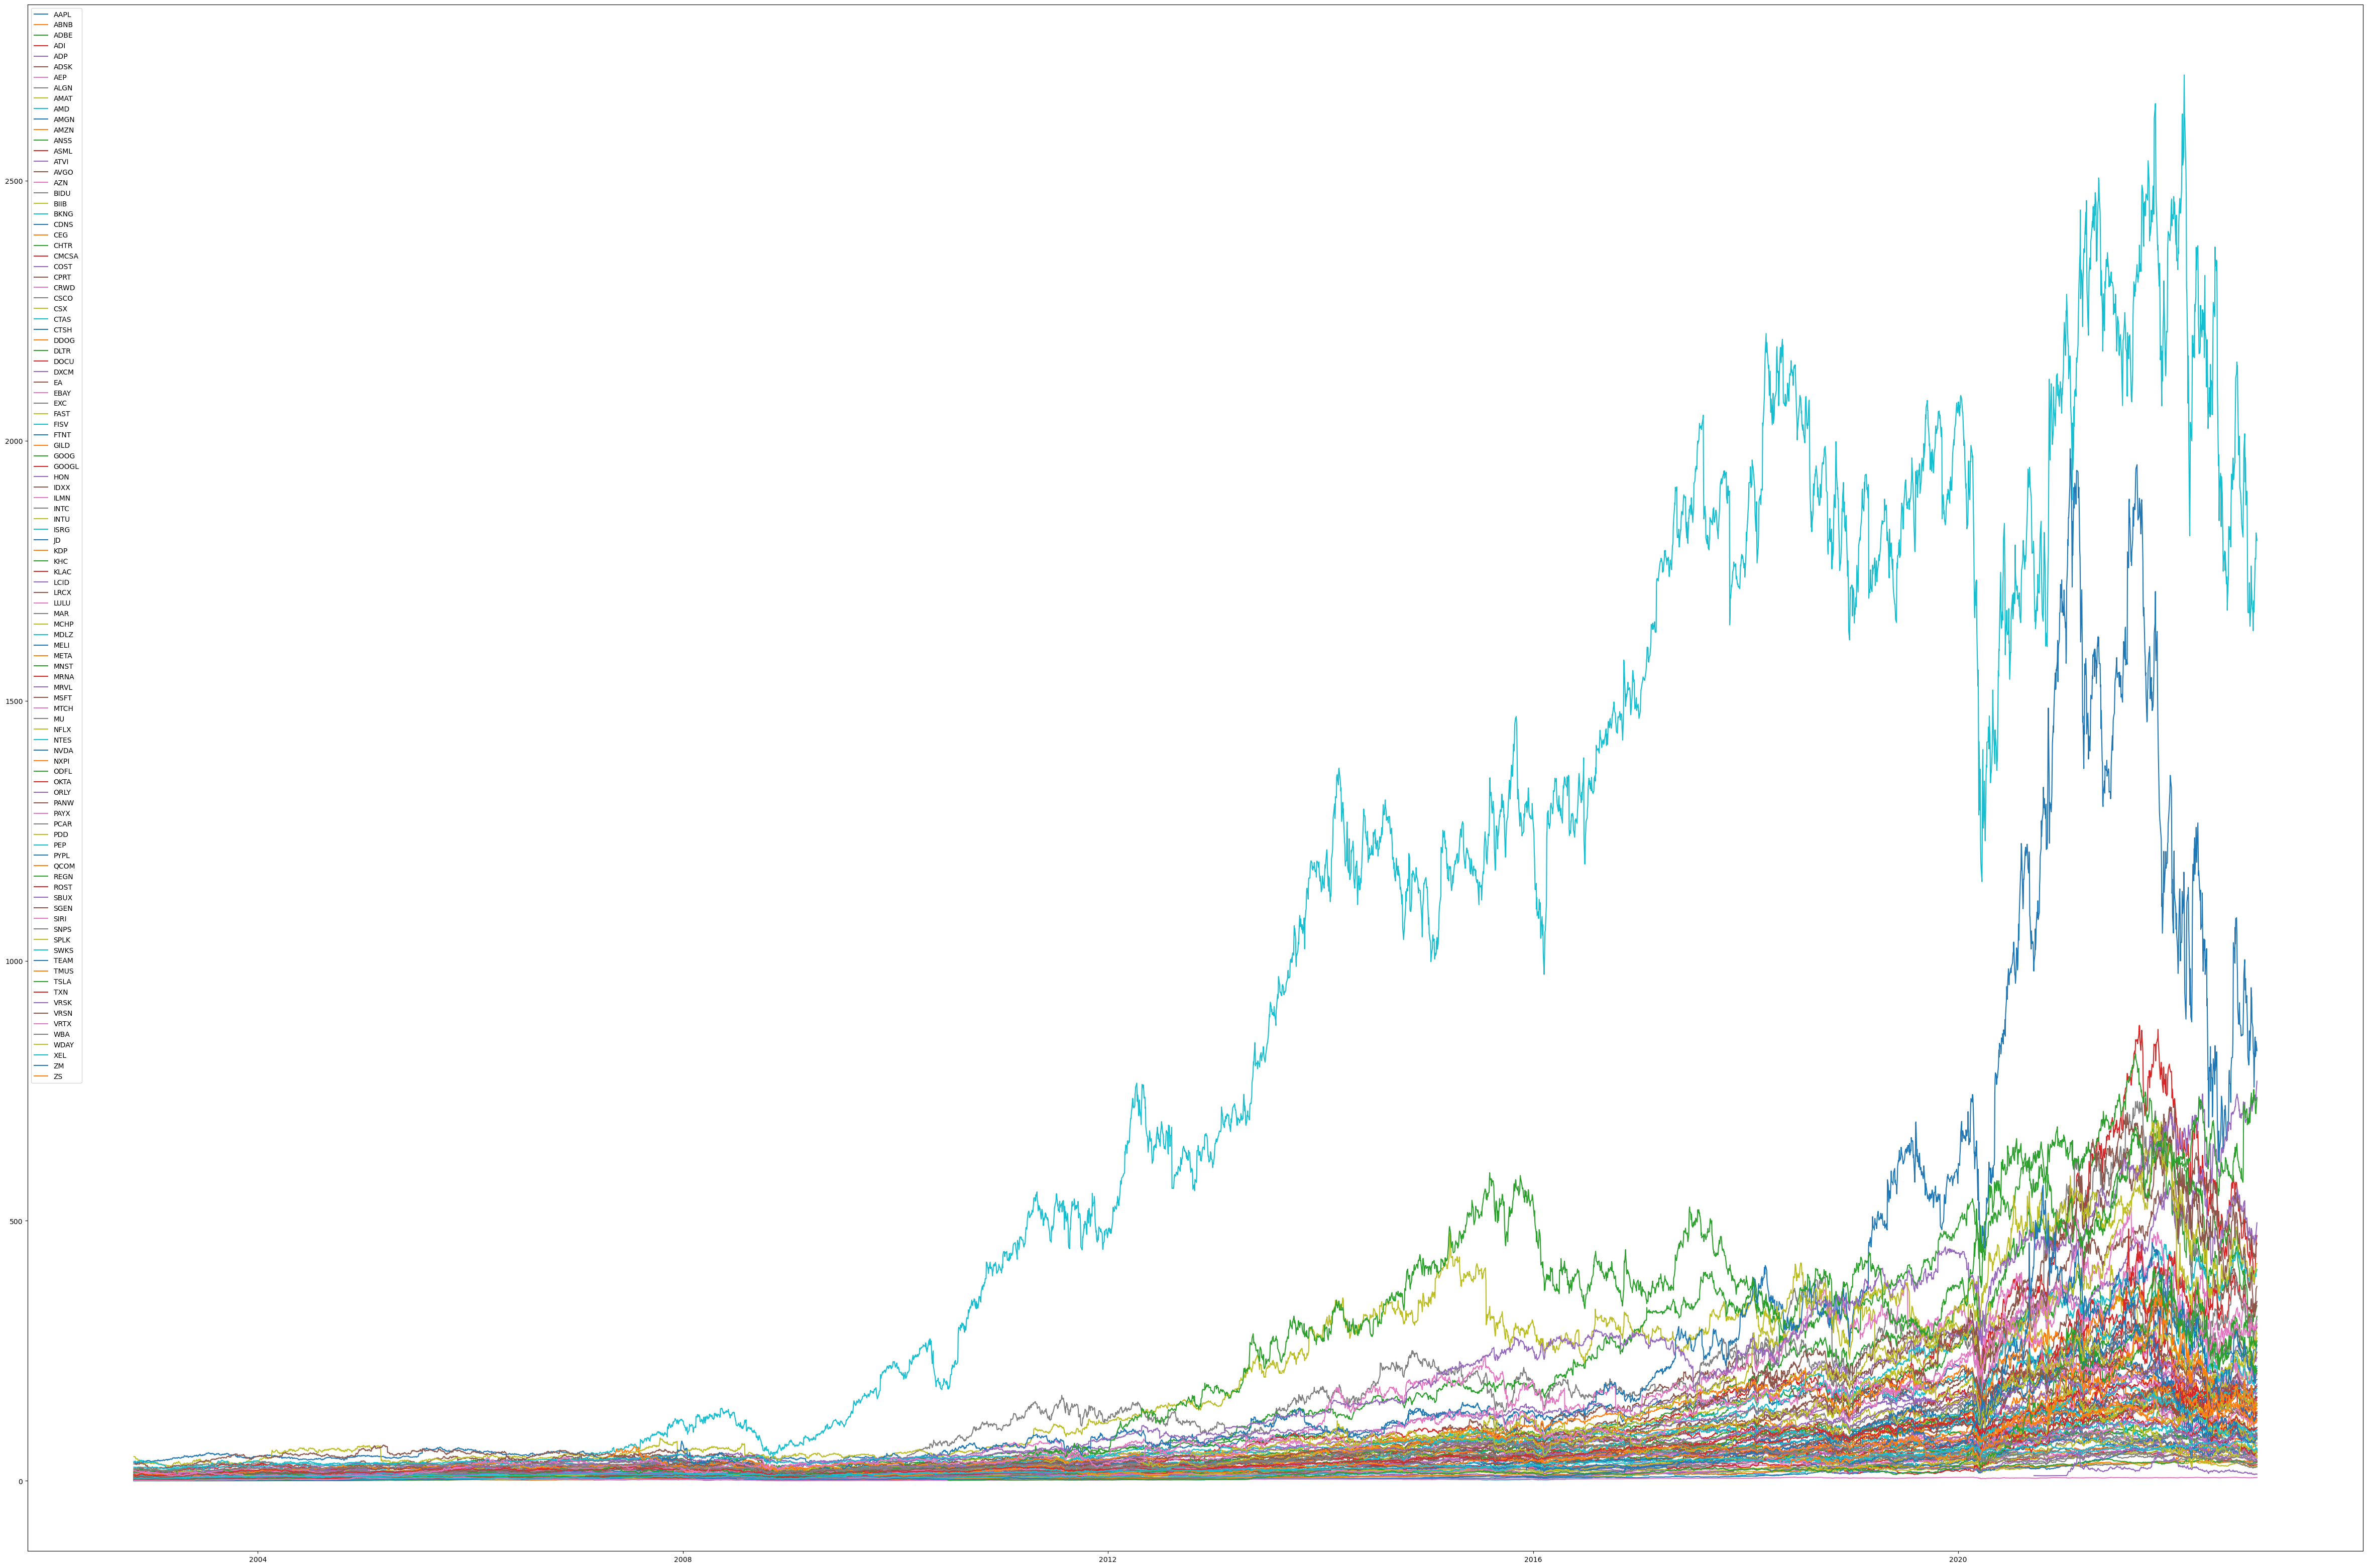

In [66]:
plt.figure(figsize = (60,40))
for s in final_data.Symbol.unique():
    y = final_data.loc[final_data.Symbol == s,'Adj Close' ]
    x = final_data.loc[final_data.Symbol == s,'Date' ]
    plt.plot(x,y, label = s)
    plt.legend(loc = 'upper left')
plt.show()

In [67]:
from dateutil.relativedelta import relativedelta as rd

start = dt.datetime(2020, 1, 20) - rd(years = 4)
start

datetime.datetime(2016, 1, 20, 0, 0)

In [68]:
end = dt.datetime(2020, 1, 20) 

In [69]:
final_data_1 = final_data.copy()

In [71]:
final_data_1 = final_data_1[['Date', 'Symbol', 'Adj Close']]

In [72]:
final_data_1['month'] = final_data_1.Date.dt.month
final_data_1['year'] = final_data_1.Date.dt.year
final_data_1['mon_yr'] = final_data_1.month.astype(str) + '-' + final_data_1.year.astype(str)

In [73]:
mon_end = final_data_1.groupby('mon_yr').agg(max)['Date']
mon_end[:5]

mon_yr
1-2003   2003-01-31
1-2004   2004-01-30
1-2005   2005-01-31
1-2006   2006-01-31
1-2007   2007-01-31
Name: Date, dtype: datetime64[ns]

In [74]:
month_end_Data = final_data_1[final_data_1.Date.isin(mon_end.values)]
month_end_Data.sort_values('Date' , inplace = True)

In [76]:
month_end_Data.sort_values(['Symbol', 'Date'], inplace = True)

In [77]:
month_end_Data['lag_series'] = month_end_Data['Adj Close'].shift(periods = 12)
month_end_Data['diff_series'] =  month_end_Data['Adj Close'] - month_end_Data['lag_series']
month_end_Data['YOY'] = month_end_Data['diff_series'] /month_end_Data['lag_series']*100
month_end_Data[:20]

Date Symbol  Adj Close  month  year   mon_yr  lag_series  \
19  2002-11-29   AAPL   0.235937     11  2002  11-2002         NaN   
40  2002-12-31   AAPL   0.218128     12  2002  12-2002         NaN   
61  2003-01-31   AAPL   0.218585      1  2003   1-2003         NaN   
80  2003-02-28   AAPL   0.228479      2  2003   2-2003         NaN   
101 2003-03-31   AAPL   0.215236      3  2003   3-2003         NaN   
122 2003-04-30   AAPL   0.216454      4  2003   4-2003         NaN   
143 2003-05-30   AAPL   0.273231      5  2003   5-2003         NaN   
164 2003-06-30   AAPL   0.290126      6  2003   6-2003         NaN   
186 2003-07-31   AAPL   0.320875      7  2003   7-2003         NaN   
207 2003-08-29   AAPL   0.344164      8  2003   8-2003         NaN   
228 2003-09-30   AAPL   0.315395      9  2003   9-2003         NaN   
251 2003-10-31   AAPL   0.348426     10  2003  10-2003         NaN   
270 2003-11-28   AAPL   0.318287     11  2003  11-2003    0.235937   
292 2003-12-31   AAPL   0.325289     12  2003  12-2003    0.218128   
312 2004-01-30   AAPL   0.343402      1  2004   1-2004    0.218585   
331 2004-02-27   AAPL   0.364104      2  2004   2-2004    0.228479   
354 2004-03-31   AAPL   0.411596      3  2004   3-2004    0.215236   
375 2004-04-30   AAPL   0.392417      4  2004   4-2004    0.216454   
395 2004-05-28   AAPL   0.427122      5  2004   5-2004    0.273231   
416 2004-06-30   AAPL   0.495315      6  2004   6-2004    0.290126   

     diff_series        YOY  
19           NaN        NaN  
40           NaN        NaN  
61           NaN        NaN  
80           NaN        NaN  
101          NaN        NaN  
122          NaN        NaN  
143          NaN        NaN  
164          NaN        NaN  
186          NaN        NaN  
207          NaN        NaN  
228          NaN        NaN  
251          NaN        NaN  
270     0.082350  34.903158  
292     0.107161  49.127621  
312     0.124818  57.102746  
331     0.135626  59.360352  
354     0.196360  91.230493  
375     0.175963  81.293637  
395     0.153891  56.322866  
416     0.205189  70.723958

In [78]:
month_end_Data = month_end_Data[['Date', 'Symbol','Adj Close', 'YOY']]
month_end_Data.head(20)

Date Symbol  Adj Close        YOY
19  2002-11-29   AAPL   0.235937        NaN
40  2002-12-31   AAPL   0.218128        NaN
61  2003-01-31   AAPL   0.218585        NaN
80  2003-02-28   AAPL   0.228479        NaN
101 2003-03-31   AAPL   0.215236        NaN
122 2003-04-30   AAPL   0.216454        NaN
143 2003-05-30   AAPL   0.273231        NaN
164 2003-06-30   AAPL   0.290126        NaN
186 2003-07-31   AAPL   0.320875        NaN
207 2003-08-29   AAPL   0.344164        NaN
228 2003-09-30   AAPL   0.315395        NaN
251 2003-10-31   AAPL   0.348426        NaN
270 2003-11-28   AAPL   0.318287  34.903158
292 2003-12-31   AAPL   0.325289  49.127621
312 2004-01-30   AAPL   0.343402  57.102746
331 2004-02-27   AAPL   0.364104  59.360352
354 2004-03-31   AAPL   0.411596  91.230493
375 2004-04-30   AAPL   0.392417  81.293637
395 2004-05-28   AAPL   0.427122  56.322866
416 2004-06-30   AAPL   0.495315  70.723958

In [ ]:
start = dt.datetime(2018, 1, 1)

In [79]:
data_2018 = month_end_Data[month_end_Data.Date >= start]

In [80]:
data_2018

Date Symbol   Adj Close        YOY
3332   2016-01-29   AAPL   22.278248 -15.501441
3352   2016-02-29   AAPL   22.249565 -23.336154
3374   2016-03-31   AAPL   25.079941 -10.784876
3395   2016-04-29   AAPL   21.570726 -23.709409
3416   2016-05-31   AAPL   23.118923 -21.780214
...           ...    ...         ...        ...
426678 2022-06-30     ZS  149.509995 -30.801631
426698 2022-07-29     ZS  155.059998 -34.271546
426721 2022-08-31     ZS  159.240005 -42.789392
426742 2022-09-30     ZS  164.369995 -37.315996
426758 2022-10-24     ZS  148.669998 -53.374520

[7920 rows x 4 columns]

In [95]:
complete_df = pd.merge(data_2018,nasdaq_metrics[['Symbol', 'sector']], how = 'left', left_on = 'Symbol', right_on = 'Symbol')

In [96]:
complete_df


Date Symbol   Adj Close        YOY                  sector
0    2016-01-29   AAPL   22.278248 -15.501441  Information Technology
1    2016-02-29   AAPL   22.249565 -23.336154  Information Technology
2    2016-03-31   AAPL   25.079941 -10.784876  Information Technology
3    2016-04-29   AAPL   21.570726 -23.709409  Information Technology
4    2016-05-31   AAPL   23.118923 -21.780214  Information Technology
...         ...    ...         ...        ...                     ...
7915 2022-06-30     ZS  149.509995 -30.801631  Information Technology
7916 2022-07-29     ZS  155.059998 -34.271546  Information Technology
7917 2022-08-31     ZS  159.240005 -42.789392  Information Technology
7918 2022-09-30     ZS  164.369995 -37.315996  Information Technology
7919 2022-10-24     ZS  148.669998 -53.374520  Information Technology

[7920 rows x 5 columns]

In [97]:
data_2018

Date Symbol   Adj Close        YOY
3332   2016-01-29   AAPL   22.278248 -15.501441
3352   2016-02-29   AAPL   22.249565 -23.336154
3374   2016-03-31   AAPL   25.079941 -10.784876
3395   2016-04-29   AAPL   21.570726 -23.709409
3416   2016-05-31   AAPL   23.118923 -21.780214
...           ...    ...         ...        ...
426678 2022-06-30     ZS  149.509995 -30.801631
426698 2022-07-29     ZS  155.059998 -34.271546
426721 2022-08-31     ZS  159.240005 -42.789392
426742 2022-09-30     ZS  164.369995 -37.315996
426758 2022-10-24     ZS  148.669998 -53.374520

[7920 rows x 4 columns]

In [98]:
pivot_data = data_2018.pivot(index = 'Symbol', columns = 'Date', values='YOY')

In [99]:
pivot_data.iloc[:,25:]

Date    2018-02-28  2018-03-29  2018-04-30  2018-05-31  2018-06-29  \
Symbol                                                               
AAPL     32.081005   18.637165   16.863434   24.230744   30.528747   
ABNB           NaN         NaN         NaN         NaN         NaN   
ADBE     76.719631   66.049330   65.694629   75.722542   72.376975   
ADI      11.849000   13.625356   17.130737   15.785733   25.861343   
ADP      14.860350   13.281944   15.504895   29.818434   33.738686   
...            ...         ...         ...         ...         ...   
WBA     -18.554484  -19.494218  -21.584418  -21.227197  -21.597015   
WDAY     52.743275   52.629686   42.837522   30.986200   24.865982   
XEL       2.121020    5.574236    7.283124   -1.964020    2.869386   
ZM             NaN         NaN         NaN         NaN         NaN   
ZS             NaN  -86.722483  -83.747486  -82.978999  -73.039217   

Date    2018-07-31  2018-08-31  2018-09-28  2018-10-31  2018-11-30  ...  \
Symbol                                                              ...   
AAPL     29.932123   40.897422   48.684921   31.429967    5.476342  ...   
ABNB           NaN         NaN         NaN         NaN         NaN  ...   
ADBE     67.028455   69.831144   80.955909   40.306000   38.254256  ...   
ADI      24.218103   21.186925    9.464051   -6.463669    8.912045  ...   
ADP      15.967532   40.800461   40.700627   26.523476   31.492262  ...   
...            ...         ...         ...         ...         ...  ...   
WBA     -14.253429  -13.826492   -3.292919   23.305736   19.160243  ...   
WDAY     21.457248   40.887948   38.514087   19.848641   59.223301  ...   
XEL       2.337018    0.293218    3.131265    2.306956    5.054051  ...   
ZM             NaN         NaN         NaN         NaN         NaN  ...   
ZS      -69.879723  -57.025207  -62.047464  -66.388811  -62.199116  ...   

Date    2022-01-31  2022-02-28  2022-03-31  2022-04-29  2022-05-31  \
Symbol                                                               
AAPL     33.265735   36.979553   43.796798   20.635162   20.127088   
ABNB    -16.152046  -26.585897   -8.609135  -11.290602  -13.910251   
ADBE     16.463588    1.742550   -4.154659  -22.109215  -17.460061   
ADI      13.149705    4.645659    8.352702    2.537731    4.120226   
ADP      27.232511   19.712341   23.005053   18.878680   15.876408   
...            ...         ...         ...         ...         ...   
WBA       2.806738   -0.111960  -15.291120  -17.055898  -13.273368   
WDAY     11.198521   -6.578836   -3.610669  -16.315791  -31.663168   
XEL      11.922518   18.149327   11.509200    5.588933    9.230243   
ZM      -58.534685  -64.508442  -63.512714  -68.842508  -67.589661   
ZS       28.748117   16.641465   40.548728    8.047328  -21.168899   

Date    2022-06-30  2022-07-29  2022-08-31  2022-09-30  2022-10-24  
Symbol                                                              
AAPL      0.395092   12.051595    4.130274   -1.784878    0.325391  
ABNB    -41.831003  -22.935902  -27.014647  -37.383010  -31.800072  
ADBE    -37.494026  -34.025064  -43.733615  -52.198981  -51.377697  
ADI     -13.640312    4.530494   -5.306267  -15.279236  -15.167839  
ADP       7.746127   17.193209   19.127568   15.249484    7.499936  
...            ...         ...         ...         ...         ...  
WBA     -24.935812  -12.442249  -27.870517  -30.320188  -22.970229  
WDAY    -41.534725  -33.831054  -39.756921  -39.085197  -48.979243  
XEL      10.437227   10.248073   11.046527    5.253815   -2.003109  
ZM      -72.102937  -72.531077  -72.227979  -71.858510  -70.649917  
ZS      -30.801631  -34.271546  -42.789392  -37.315996  -53.374520  

[102 rows x 57 columns]

In [101]:
pivot_data_sect = pd.concat([pivot_data,nasdaq_metrics.set_index('Symbol') [['sector']]], axis = 1)

In [102]:
df = pivot_data_sect.loc[:,(pivot_data_sect.columns == dt.datetime(2020,3, 31)) | (pivot_data_sect.columns =='sector')]
df.columns = ['march_end', 'sector']
df.sort_values('march_end', ascending= True, inplace = True)

In [103]:
df.sector.unique()

array(['Information Technology', 'Consumer Discretionary',
       'Communication Services', 'Health Care', 'Consumer Staples',
       'Utilities', 'Industrials'], dtype=object)

In [104]:
(df[df.march_end <0].sector.value_counts() / df.sector.value_counts() * 100).sort_values()

Health Care               23.076923
Information Technology    40.476190
Consumer Staples          42.857143
Communication Services    46.153846
Utilities                 50.000000
Consumer Discretionary    53.333333
Industrials               62.500000
Name: sector, dtype: float64

In [105]:
df = pivot_data_sect.loc[:,(pivot_data_sect.columns.isin([dt.datetime(2020,3, 31), 
                                                         dt.datetime(2020,6, 30), 
                                                         dt.datetime(2020,10, 30)])) | (pivot_data_sect.columns =='sector')]
df.columns = ['march_end', 'june_end', 'oct_end','sector']
#df.sort_values('march_end', ascending= True, inplace = True)

In [106]:
month_end_Data['lag'] = month_end_Data['Adj Close'].shift(periods=1)
month_end_Data['diff'] = month_end_Data['Adj Close'] - month_end_Data['lag']

In [107]:
month_end_Data['MOM'] = month_end_Data['diff']/month_end_Data['lag'] * 100

In [108]:
month_end_Data = month_end_Data[['Date', 'Symbol', 'Adj Close', 'YOY','MOM']]

In [110]:
df_1 = month_end_Data[month_end_Data.Date >= dt.datetime(2020, 3,31)].sort_values(['Symbol', 'Date'])

In [114]:
mod_data = collated_data_1.set_index('Symbol').select_dtypes(exclude = 'object')
mod_data.shape

(102, 196)

In [115]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [117]:
sc = StandardScaler()
std_data = sc.fit_transform(mod_data)

In [118]:
var_exp = {}
for n in range(1,51):
    pca = PCA (n_components= n)
    pca.fit(std_data)
    var_exp.update({n : pca.explained_variance_ratio_.sum()*100})

In [119]:
list(var_exp.keys())
list(var_exp.values())

[13.160229885722185,
 21.26996914429244,
 28.133884572357438,
 34.03618540356797,
 38.716476217518824,
 42.63350594925895,
 46.304336571938414,
 49.575360634891005,
 52.60674504530447,
 55.45531015227348,
 57.986412225995544,
 60.43410405803938,
 62.61217005931161,
 64.72049657810038,
 66.59770453833693,
 68.34014225404067,
 69.97750400780751,
 71.54038769046984,
 73.05851600255386,
 74.37508892327918,
 75.66255519821267,
 76.88347113648712,
 77.97348671457311,
 79.03024066004023,
 80.0431198916534,
 81.01158557699439,
 81.93068277898779,
 82.83831294708517,
 83.72567693562144,
 84.5926721764121,
 85.37696819594103,
 86.15970551808071,
 86.89613264891648,
 87.60505740041084,
 88.27082658303719,
 88.86444837782241,
 89.45232135253548,
 90.02221312980049,
 90.5604645549915,
 91.0799036959897,
 91.58735338308458,
 92.08355198530813,
 92.56043946307253,
 93.02347230902194,
 93.43821553295503,
 93.84328420345243,
 94.21750917371848,
 94.57541629534616,
 94.92144833256181,
 95.24950917338444

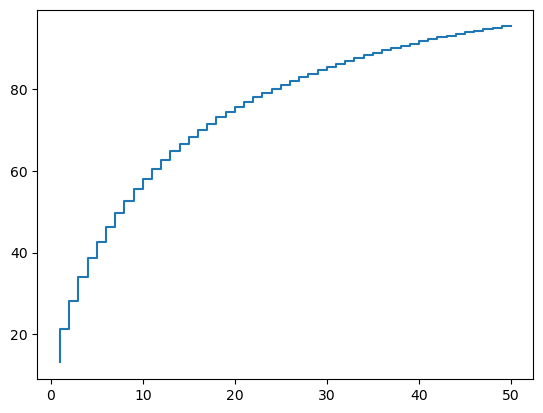

In [120]:
plt.step(list(var_exp.keys()),list(var_exp.values()))
plt.show()

In [121]:
pca = PCA (n_components= 38)
pca.fit(std_data)
(pca.explained_variance_ratio_*100).round(2).cumsum()

array([13.16, 21.27, 28.13, 34.03, 38.71, 42.63, 46.3 , 49.57, 52.6 ,
       55.45, 57.98, 60.43, 62.61, 64.72, 66.6 , 68.34, 69.98, 71.54,
       73.06, 74.38, 75.67, 76.89, 77.98, 79.04, 80.05, 81.02, 81.94,
       82.85, 83.74, 84.61, 85.39, 86.17, 86.91, 87.62, 88.29, 88.88,
       89.47, 90.04])

In [122]:
pca.transform(std_data).shape

(102, 38)

In [123]:
data_clus = pd.DataFrame(pca.transform(std_data), columns = ['PC{}'.format(i+1) for i in range(38)])
data_clus.index = mod_data.index

In [125]:
data_clus

PC1        PC2       PC3       PC4       PC5       PC6       PC7  \
Symbol                                                                          
AAPL    2.508779  -2.059098 -1.584418 -2.088492 -0.202303  2.629262  0.141312   
ABNB    1.052795   4.444473  0.234520 -0.237378 -1.833663  0.127684  1.311946   
ADBE   -3.219014   1.080023 -2.194774 -0.717679  0.892588 -1.634878  0.885902   
ADI    -0.123312  -3.613646 -0.204188  3.208105 -0.300550 -2.749567  1.852539   
ADP     1.776947  -1.366474 -0.636562  0.379961 -2.531387  1.956196  1.958174   
...          ...        ...       ...       ...       ...       ...       ...   
WBA     3.666689  -4.797665 -0.814992 -4.136168 -2.490703  2.528439 -1.714499   
WDAY   -0.063577   3.062152 -0.206919  0.780144 -1.153935 -0.445071  0.978552   
XEL     6.597224  -2.295574  1.514641  5.421928 -2.871463 -0.979524  0.145850   
ZM     -7.799118   5.952514  0.848748 -2.678293 -1.438045 -1.101442 -1.988631   
ZS     -0.760371  10.267824  1.767498  0.674330  2.134901  0.725853  4.937897   

             PC8       PC9      PC10  ...      PC29      PC30      PC31  \
Symbol                                ...                                 
AAPL   -0.258179 -0.969263 -0.072883  ...  0.274594 -1.289807 -1.301752   
ABNB   -0.479320  2.976805 -6.345660  ...  1.919134  3.899206  0.412855   
ADBE    0.496283 -1.697916 -1.381777  ...  0.206993  1.186022 -0.721061   
ADI    -0.441778 -0.112619  0.349087  ...  0.492689  0.854499  0.081958   
ADP    -0.545353 -0.077636 -1.944790  ...  0.062147 -0.777171 -0.343856   
...          ...       ...       ...  ...       ...       ...       ...   
WBA    -0.132338  0.909310  1.198217  ...  0.576719  2.375083  0.085323   
WDAY   -3.568472 -1.195933 -1.971713  ...  1.461751  2.519211  1.106552   
XEL    -1.059192  0.841964  1.221249  ...  1.202513 -0.306832 -1.110123   
ZM      6.767922  2.132562 -6.293626  ...  1.525298 -1.944251  0.066772   
ZS     -6.533059 -1.846527  2.986886  ...  0.873243 -1.029421  0.144781   

            PC32      PC33      PC34      PC35      PC36      PC37      PC38  
Symbol                                                                        
AAPL   -2.640428 -0.747464  0.069812 -0.729245 -0.289137 -0.265812  0.071802  
ABNB    1.220387 -2.933663 -1.467199 -2.187527  1.745256 -1.023764 -0.492250  
ADBE   -0.830476  1.005554  0.872081  0.284651  0.039153 -0.530643  0.063841  
ADI     0.306140 -0.308680  0.343213  0.726728  0.819607 -0.168936  1.666022  
ADP     0.262265  0.699786  1.321764  1.120539 -0.376106  0.542871 -0.414144  
...          ...       ...       ...       ...       ...       ...       ...  
WBA    -1.769230  0.126883 -1.094836  1.110033  0.154702 -0.055277 -0.483425  
WDAY   -0.015717 -0.688566 -1.200748  3.211939 -1.565200  1.269960 -1.890091  
XEL     0.414044 -0.009726 -0.224233 -0.783962 -0.883068  0.341367 -1.035188  
ZM     -0.065172 -0.616001  0.233615 -1.050993  0.896517  0.329399 -1.142908  
ZS     -1.523327 -0.355024  1.944118 -0.527871  2.017604 -0.606520  0.040566  

[102 rows x 38 columns]

In [127]:
data_clus1 = data_clus.merge(nasdaq_metrics,left_index=True, right_index=False, right_on='Symbol')[['PC'+str(i) for i in range(1,39)]+['sector']]

In [128]:
data_clus12 = pd.get_dummies(data_clus1, columns = ['sector'],drop_first=True)

In [129]:
from sklearn.cluster import KMeans
clus_std = sc.fit_transform(data_clus12)

In [130]:
errors = {}
for i in range(1,100):
    kmm = KMeans(n_clusters=i, random_state = 12)
    kmm.fit(clus_std)
    errors.update({i :round(kmm.inertia_,2)})
err = pd.Series(errors)

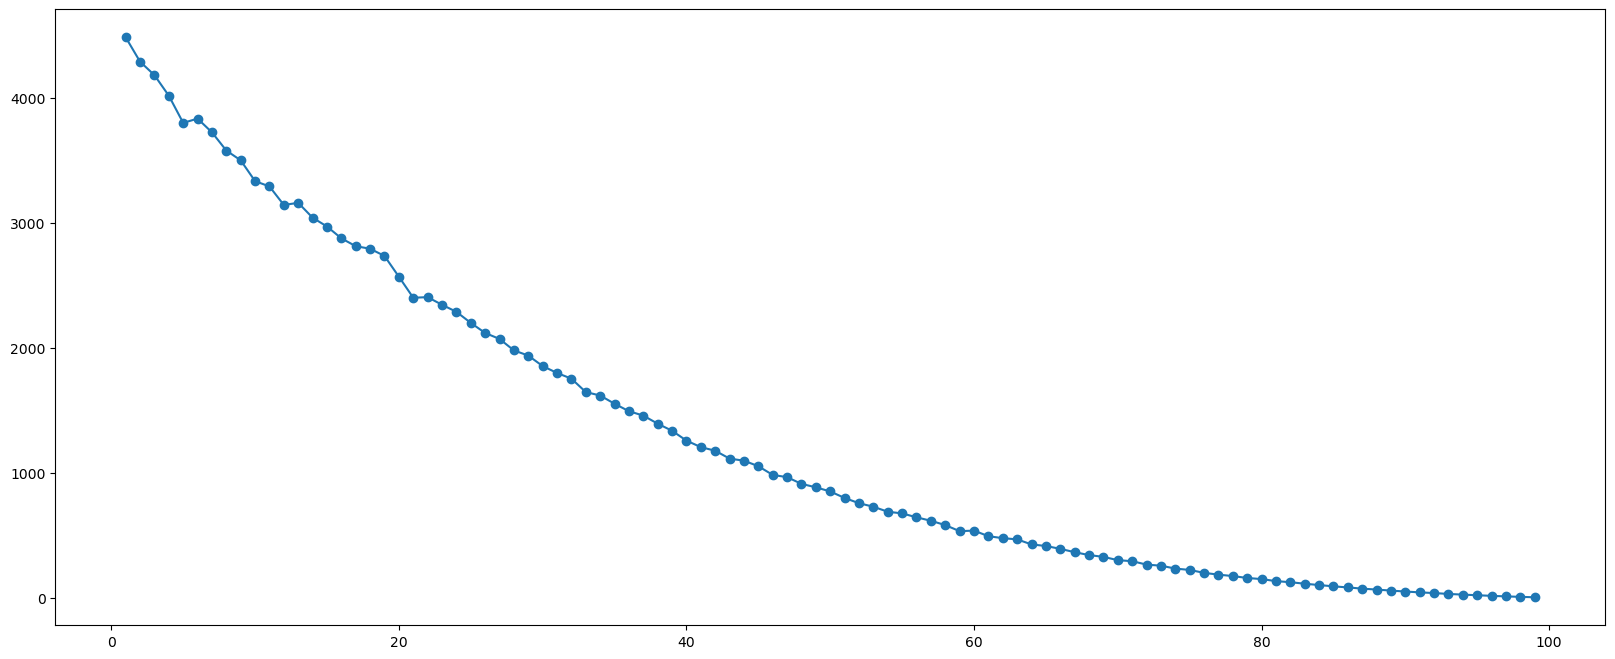

In [131]:
plt.figure(figsize = (20, 8))
plt.plot(err.index, err.values)
plt.scatter(err.index, err.values)
plt.show()

In [132]:
kmm = KMeans(n_clusters=7, random_state = 12)
kmm.fit(clus_std)
clus_labs = kmm.labels_

In [135]:
collated_data_1.insert(loc = 0, column='cluster_label', value=clus_labs)

In [136]:
collated_data_1.head()

cluster_label Symbol     Market Cap Last Sale         company  \
0              6   AAPL  2625740143000   $151.45      Apple Inc.   
1              4   ABNB    69569944167   $116.65          Airbnb   
2              6   ADBE   149144569000   $320.81      Adobe Inc.   
3              1    ADI    75484763090   $146.76  Analog Devices   
4              6    ADP    98332762096   $236.78             ADP   

                   sector                                   subsector  \
0  Information Technology  Technology Hardware, Storage & Peripherals   
1  Consumer Discretionary          Internet & Direct Marketing Retail   
2  Information Technology                        Application Software   
3  Information Technology                              Semiconductors   
4  Information Technology       Data Processing & Outsourced Services   

   asset_turnover_2017  asset_turnover_2018  asset_turnover_2019  ...  \
0                0.660                 0.72                 0.74  ...   
1                0.825                 0.55                 0.64  ...   
2                0.540                 0.54                 0.57  ...   
3                0.360                 0.30                 0.29  ...   
4                0.555                 0.34                 0.34  ...   

   yoy_eps_growth_2019  yoy_eps_growth_2020  yoy_eps_growth_2021  \
0               -0.340               10.440                71.04   
1               12.505               34.085                96.46   
2               15.380               80.500                -7.48   
3               -8.750              -10.140                 5.49   
4               23.290                8.780                 6.49   

   yoy_eps_growth_latest  yoy_revenue_growth_2017  yoy_revenue_growth_2018  \
0                  -7.69                   11.340                    21.69   
1                 609.09                   23.355                    40.08   
2                  -3.97                   25.510                    24.45   
3                   6.67                   36.640                    10.91   
4                  19.05                   12.900                     8.65   

   yoy_revenue_growth_2019  yoy_revenue_growth_2020  yoy_revenue_growth_2021  \
0                     5.36                    11.94                    38.50   
1                    31.58                    31.27                   -18.11   
2                    25.21                    16.86                    23.69   
3                    -3.22                    -6.25                    21.07   
4                     7.16                     4.84                     4.95   

   yoy_revenue_growth_latest  
0                       5.11  
1                      41.00  
2                      15.54  
3                      26.30  
4                      12.02  

[5 rows x 202 columns]

In [137]:
collated_data_1.groupby('cluster_label').size()

cluster_label
0     2
1    25
2     4
3     7
4    35
5     9
6    20
dtype: int64

In [139]:
collated_data_1[['Symbol','cluster_label','sector']].sort_values(by='cluster_label')

Symbol  cluster_label                  sector
49    ISRG              0             Health Care
70    NVDA              0  Information Technology
67      MU              1  Information Technology
30    CTSH              1  Information Technology
86    SIRI              1  Communication Services
..     ...            ...                     ...
48    INTU              6  Information Technology
100     ZM              6  Information Technology
65    MSFT              6  Information Technology
33    DOCU              6  Information Technology
101     ZS              6  Information Technology

[102 rows x 3 columns]

In [140]:
for i in range(7):
    print(collated_data_1[['Symbol','cluster_label','sector']].sort_values(by='cluster_label')[collated_data_1.cluster_label	 == i],'\n\n')

   Symbol  cluster_label                  sector
49   ISRG              0             Health Care
70   NVDA              0  Information Technology 


   Symbol  cluster_label                  sector
67     MU              1  Information Technology
30   CTSH              1  Information Technology
86   SIRI              1  Communication Services
66   MTCH              1  Communication Services
93    TXN              1  Information Technology
26   CRWD              1  Information Technology
23  CMCSA              1  Communication Services
58   MCHP              1  Information Technology
39   FISV              1  Information Technology
71   NXPI              1  Information Technology
73   OKTA              1  Information Technology
64   MRVL              1  Information Technology
15   AVGO              1  Information Technology
55   LRCX              1  Information Technology
95   VRSN              1  Information Technology
12   ANSS              1  Information Technology
76   PAYX        

In [141]:
final_data_AAPL = final_data[final_data.Symbol == 'AAPL'][['Date','Adj Close']]

In [142]:
final_data_AAPL.columns

Index(['Date', 'Adj Close'], dtype='object')

In [144]:
final_data.head()

Symbol       Date      High       Low      Open     Close       Volume  \
0   AAPL 2002-11-01  0.294643  0.283750  0.284643  0.292143  189828800.0   
1   AAPL 2002-11-04  0.310357  0.291964  0.294643  0.301607  376818400.0   
2   AAPL 2002-11-05  0.302857  0.291964  0.299107  0.301786  210694400.0   
3   AAPL 2002-11-06  0.309286  0.298214  0.305000  0.307500  216389600.0   
4   AAPL 2002-11-07  0.305357  0.282321  0.302500  0.285714  336179200.0   

   Adj Close  
0   0.249028  
1   0.257095  
2   0.257248  
3   0.262119  
4   0.243548

In [145]:
final_data.tail()

Symbol       Date        High         Low        Open       Close  \
426754     ZS 2022-10-18  152.500000  146.679993  151.100006  149.690002   
426755     ZS 2022-10-19  151.210007  146.000000  147.910004  148.770004   
426756     ZS 2022-10-20  154.880005  148.848999  149.279999  150.229996   
426757     ZS 2022-10-21  150.919998  142.710007  148.979996  150.479996   
426758     ZS 2022-10-24  151.460007  144.300003  151.360001  148.669998   

           Volume   Adj Close  
426754  2059400.0  149.690002  
426755  1594500.0  148.770004  
426756  1709500.0  150.229996  
426757  2140900.0  150.479996  
426758  1375200.0  148.669998

In [146]:
start = dt.datetime(2015, 1, 1)
start

datetime.datetime(2015, 1, 1, 0, 0)

In [150]:
data_AAPL_2015 = final_data_AAPL[final_data_AAPL.Date>=start]

In [151]:
apple = data_AAPL_2015.set_index('Date')

In [152]:
apple.index


DatetimeIndex(['2015-01-02', '2015-01-05', '2015-01-06', '2015-01-07',
               '2015-01-08', '2015-01-09', '2015-01-12', '2015-01-13',
               '2015-01-14', '2015-01-15',
               ...
               '2022-10-11', '2022-10-12', '2022-10-13', '2022-10-14',
               '2022-10-17', '2022-10-18', '2022-10-19', '2022-10-20',
               '2022-10-21', '2022-10-24'],
              dtype='datetime64[ns]', name='Date', length=1967, freq=None)

In [157]:
apple.sort_index(inplace=True)

In [158]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.stattools import adfuller

In [159]:
def decompose(time_series):
    ts_log = np.log(time_series)
    decompose = seasonal_decompose(ts_log, period = 12)
    trend = decompose.trend
    seasonal = decompose.seasonal
    irregular = decompose.resid 
    f,ax = plt.subplots(4,1,figsize = (10,10))
    ax[0].plot(ts_log, label = 'Original')
    ax[0].legend(loc ='best')
    ax[1].plot(trend, label = 'trend')
    ax[1].legend(loc ='best')
    ax[2].plot(seasonal, label = 'seasonal')
    ax[2].legend(loc ='best')
    ax[3].plot(irregular, label = 'irregular')
    ax[3].legend(loc ='best')
    plt.show()
    return irregular

<Figure size 2500x1000 with 0 Axes>

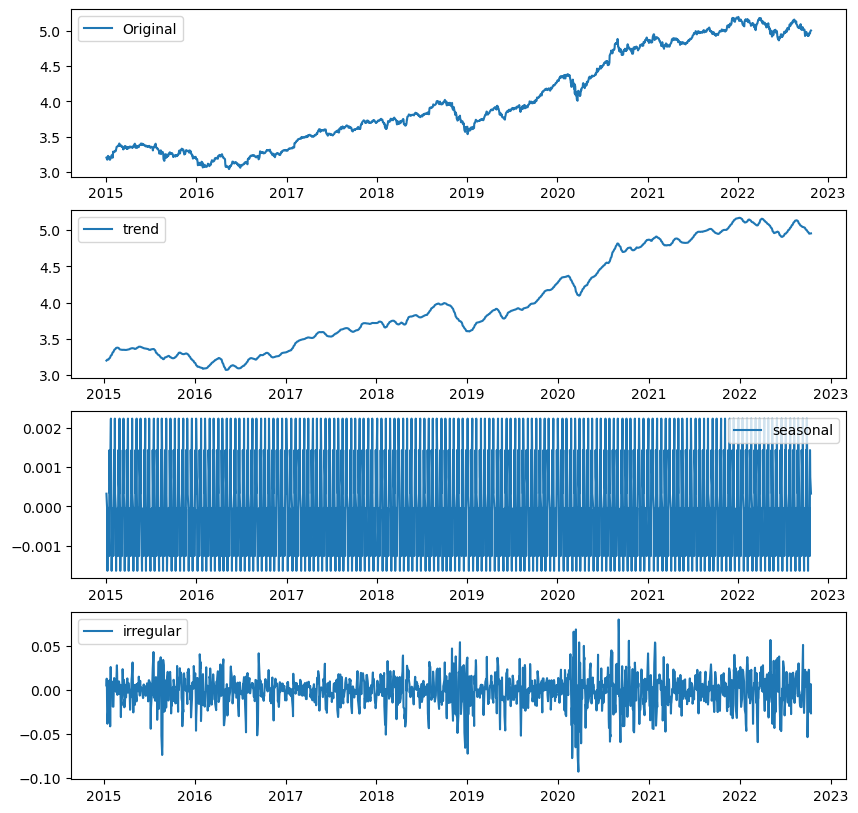

In [161]:
plt.figure(figsize=(25,10))
ts_decomposed = decompose(apple)
plt.show()

In [162]:
apple.squeeze()[1:10]

Date
2015-01-05    23.910093
2015-01-06    23.912338
2015-01-07    24.247652
2015-01-08    25.179300
2015-01-09    25.206299
2015-01-12    24.585203
2015-01-13    24.803484
2015-01-14    24.708967
2015-01-15    24.038361
Name: Adj Close, dtype: float64

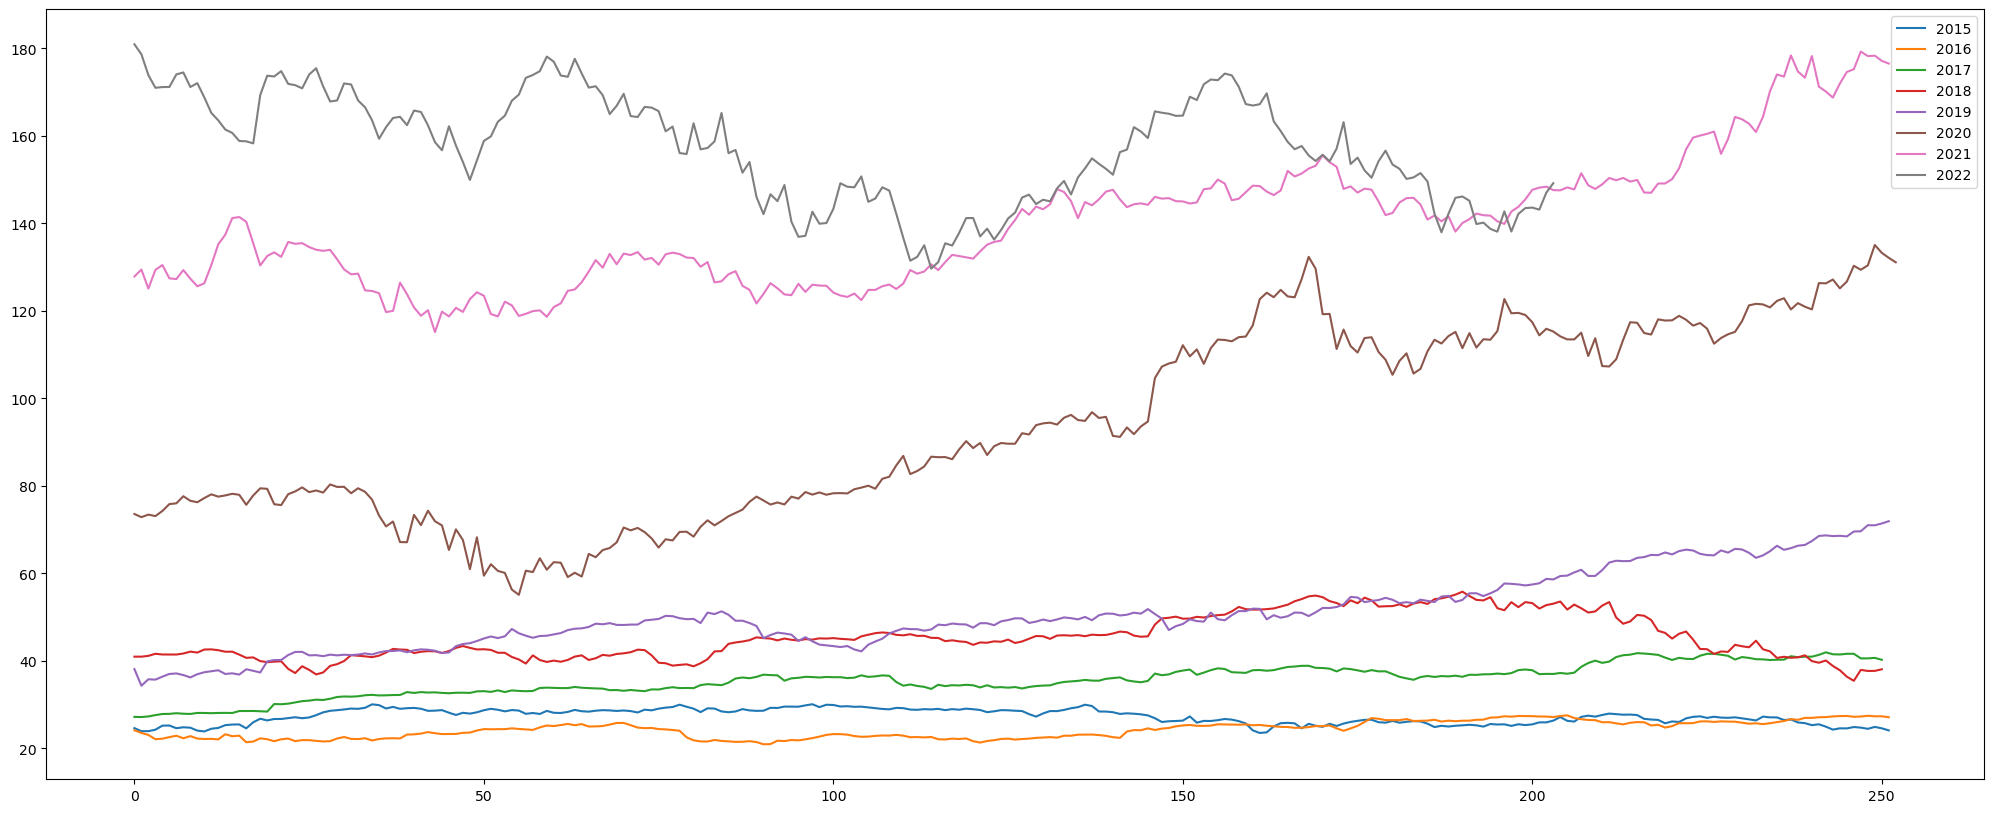

In [166]:
plt.figure(figsize=(25,10))
for i in (range(2015,2023)):
    x = list(apple.squeeze()[str(i)])
    plt.plot(x,label=i)


plt.legend()    
plt.show()

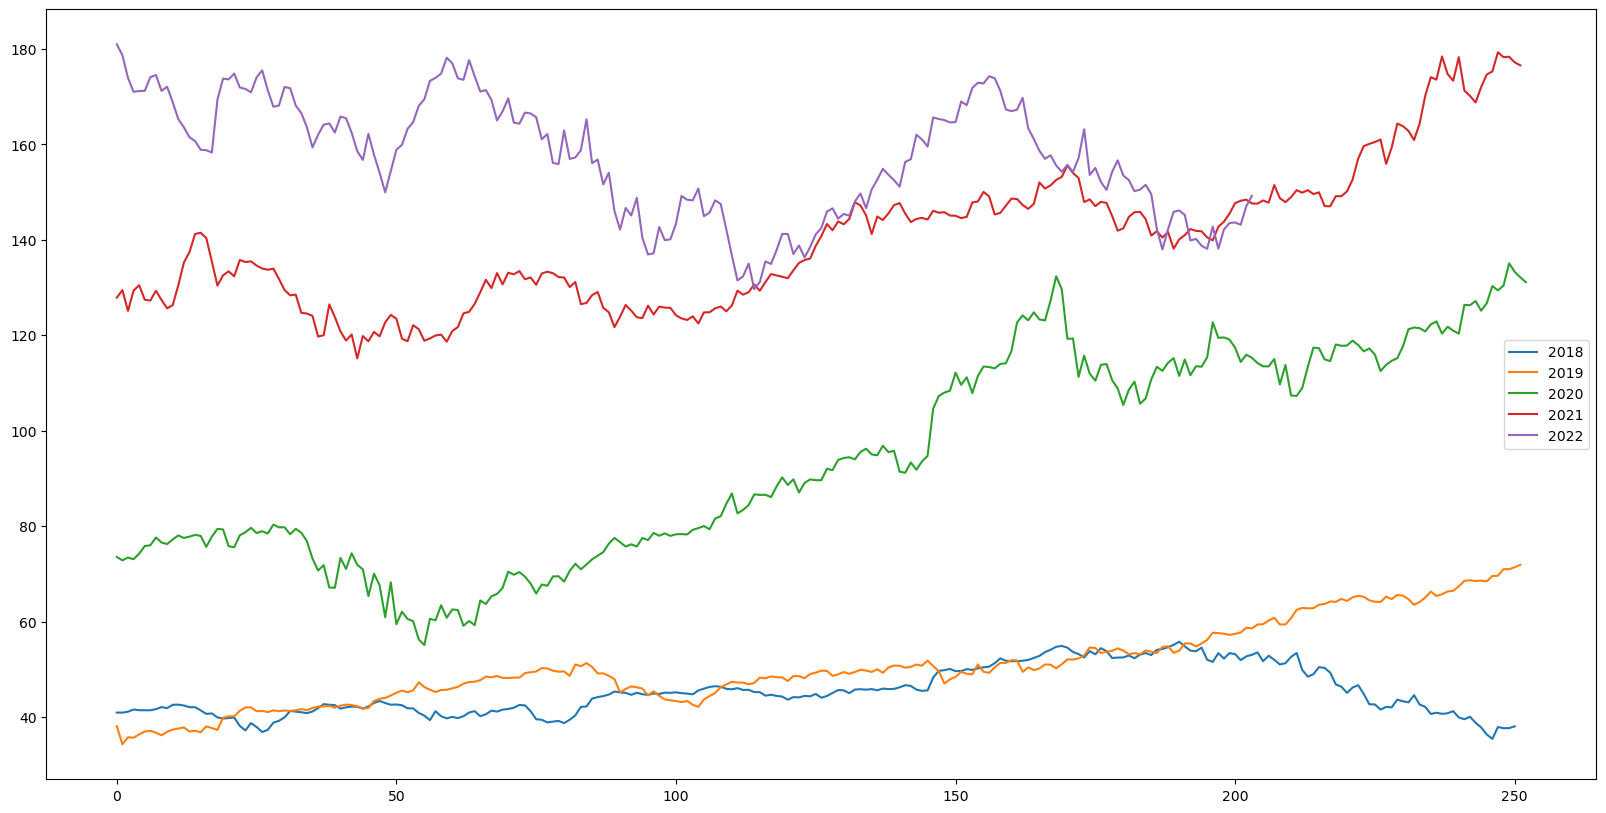

In [167]:
plt.figure(figsize=(20,10))
for i in (range(2018,2023)):
    x = list(apple.squeeze()[str(i)])
    plt.plot(x,label=i)

plt.legend()
plt.show()

In [168]:
apple_1 = apple.copy()

In [169]:
apple_1.reset_index(inplace=True)

In [171]:
apple_1['weekday'] = apple_1.Date.dt.weekday

In [172]:
week_end_data = apple_1[apple_1.weekday == 4]
week_end_data.tail(10)

Date   Adj Close  weekday
1921 2022-08-19  171.235947        4
1926 2022-08-26  163.349014        4
1931 2022-09-02  155.551956        4
1935 2022-09-09  157.109375        4
1940 2022-09-16  150.450424        4
1945 2022-09-23  150.180862        4
1950 2022-09-30  137.971115        4
1955 2022-10-07  139.857986        4
1960 2022-10-14  138.150833        4
1965 2022-10-21  147.026108        4

In [173]:
week_end_data.drop(columns='weekday', inplace=True)

In [174]:
week_end_data.set_index('Date', inplace=True)

In [175]:
apple_weekend = week_end_data.squeeze()

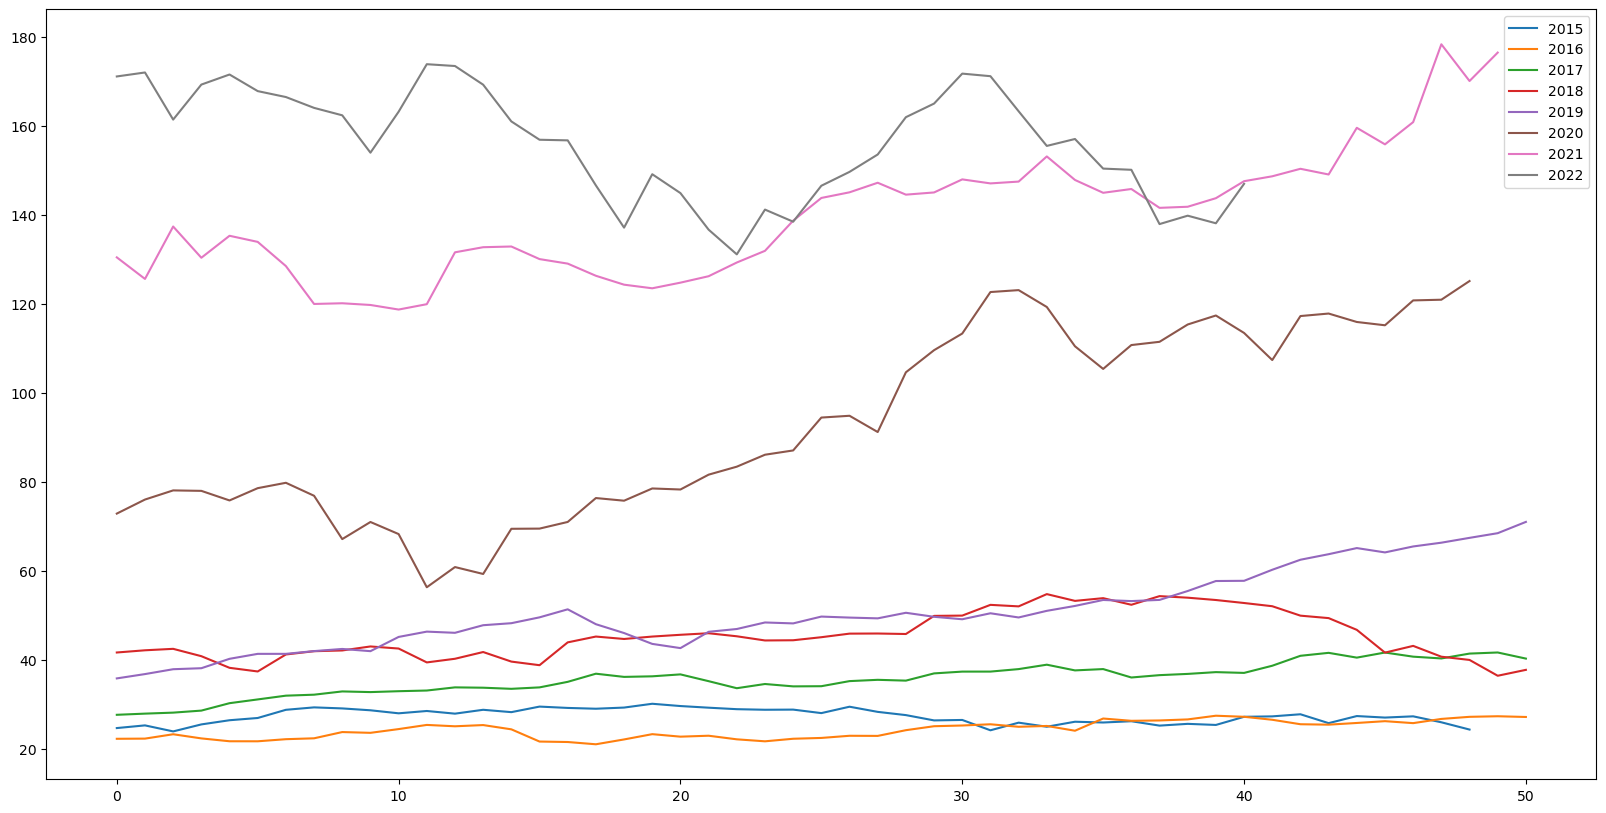

In [176]:
plt.figure(figsize=(20,10))
for i in (range(2015,2023)):
    x = list(apple_weekend[str(i)])
    plt.plot(x,label=i)


plt.legend()    
plt.show()

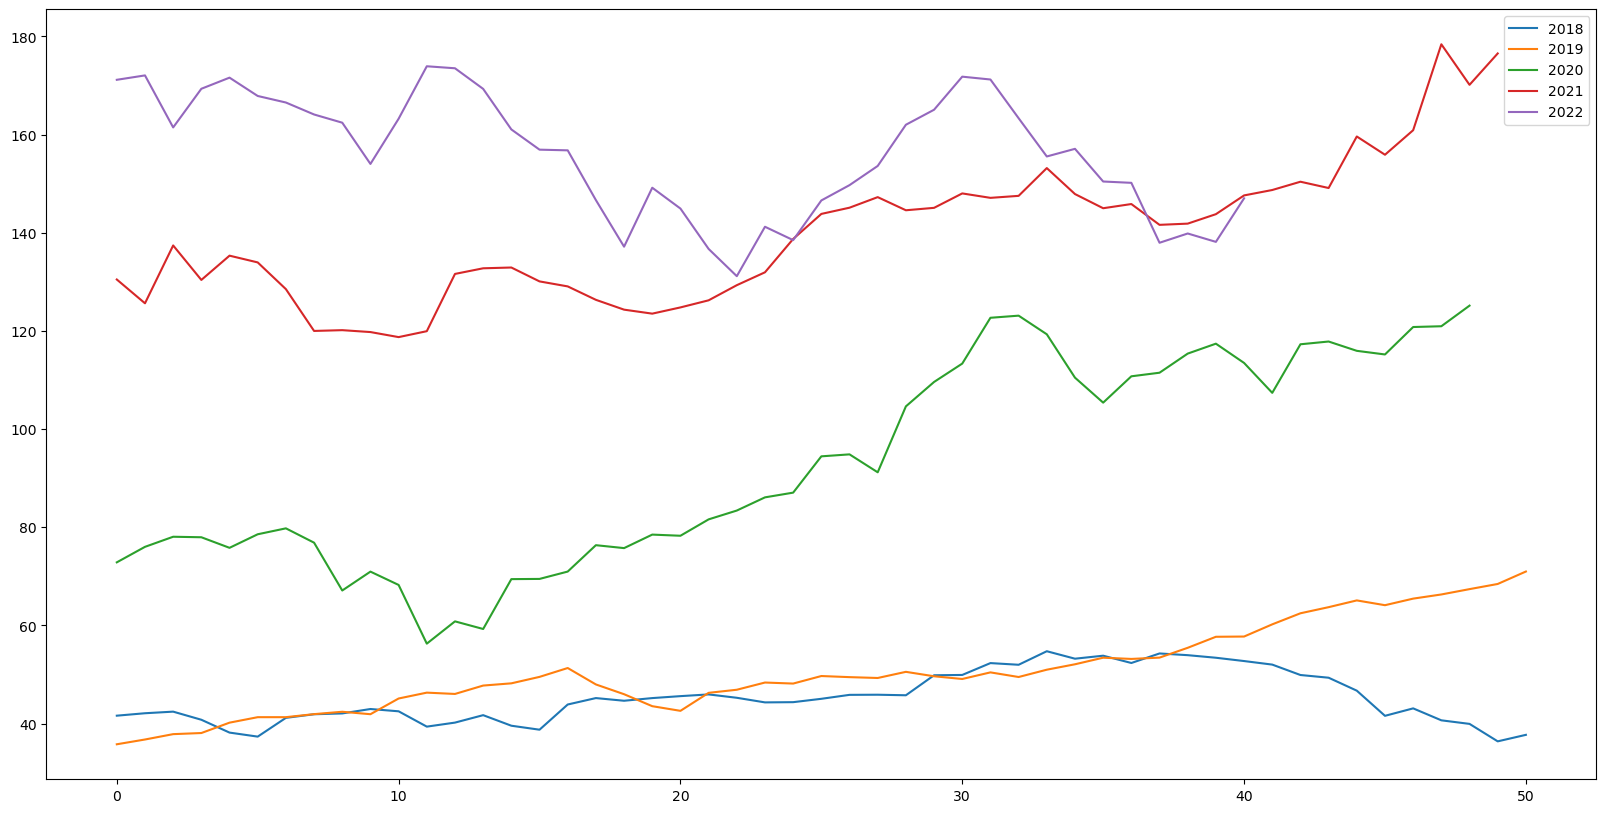

In [177]:
plt.figure(figsize=(20,10))
for i in (range(2018,2023)):
    x = list(apple_weekend[str(i)])
    plt.plot(x,label=i)

plt.legend()
plt.show()

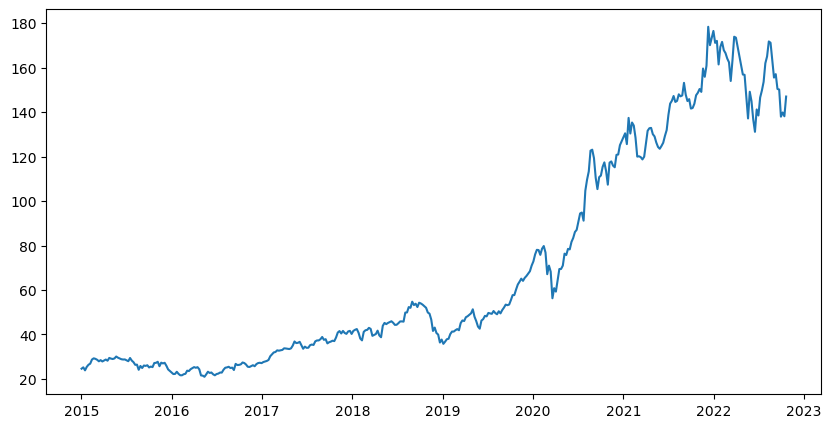

In [178]:
plt.figure(figsize = (10,5))
plt.plot(apple_weekend)
plt.show()

In [179]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [180]:
len(apple_weekend)

393

In [181]:
apple_weekend

Date
2015-01-02     24.603207
2015-01-09     25.206299
2015-01-16     23.851587
2015-01-23     25.424585
2015-01-30     26.365240
                 ...    
2022-09-23    150.180862
2022-09-30    137.971115
2022-10-07    139.857986
2022-10-14    138.150833
2022-10-21    147.026108
Name: Adj Close, Length: 393, dtype: float64

In [185]:
X = apple_weekend[:-12]
Y = apple_weekend[-12:]

In [186]:
X

Date
2015-01-02     24.603207
2015-01-09     25.206299
2015-01-16     23.851587
2015-01-23     25.424585
2015-01-30     26.365240
                 ...    
2022-07-01    138.507507
2022-07-08    146.592850
2022-07-15    149.713348
2022-07-22    153.621414
2022-07-29    162.015808
Name: Adj Close, Length: 381, dtype: float64

In [187]:
X.to_excel('exp_sm.xlsx')

In [188]:
model=ExponentialSmoothing(train,trend='mul', seasonal='add', seasonal_periods=7).fit()

C:\Users\saisa\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [189]:
forecast = model.forecast(12)

C:\Users\saisa\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [190]:
forecast

381    162.454675
382    162.668863
383    163.555567
384    164.991151
385    164.974021
386    165.638647
387    165.667142
388    166.445882
389    166.668562
390    167.563775
391    169.007887
392    168.999302
dtype: float64

In [191]:
from sklearn.metrics import mean_absolute_percentage_error

In [192]:
mean_absolute_percentage_error(test,forecast)

0.10226893078316389

In [193]:
model_final = ExponentialSmoothing(apple_weekend,trend='mul', seasonal='add', seasonal_periods=12).fit()

C:\Users\saisa\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [194]:
model_final.forecast(12)

C:\Users\saisa\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


393    146.094759
394    146.448853
395    146.907893
396    146.518415
397    146.983711
398    148.134405
399    149.205106
400    149.252791
401    149.162432
402    149.040202
403    149.704197
404    150.964504
dtype: float64

In [195]:
def test_stationarity(ts, title=""):
    # mean and variance for the series
    f , ax = plt.subplots(1,2, figsize = (25,5))
    ax[0].plot(ts, label = 'Original')
    ax[0].set_title(title, size = 30)
    
    # rolling stats
    rolling_mean = ts.rolling(window = 12).mean()
    rolling_std = ts.rolling(window = 12).std()
    
    ax[0].plot(rolling_mean, color = 'red', label = 'Rolling Mean')
    ax[0].plot(rolling_std, color = 'black', label = 'Rolling STD')
    ax[0].legend(loc = 'best')
    
    # Adfuller test 
    dftest = adfuller(ts)
    df = pd.Series(dftest[:4], index = ['Test Statistics', 'p-value', '# Lags Used', '# Obs used'])
    
    if (df['p-value'] >= 0.05):
        ax[1].annotate('Fail to Reject the Null'.center(35), xy = (0.25, 0.8), size = 25)
        ax[1].annotate('Non Stationary'.center(35), xy = (0.25, 0.7), size = 25)
    else : 
        ax[1].annotate('Reject the Null'.center(35), xy = (0.25, 0.8), size = 25)
        ax[1].annotate('Stationary'.center(35), xy = (0.25, 0.7), size = 25)
    
    c = 0.4
    for i in range(4):
        text = '{}    : {:.4f}'.format(df.index[i], df[i])
        ax[1].annotate(text, xy = (0.1, c), size = 15)
        c -= 0.1
    c = 0.4
    for i in dftest[4].keys():
        text = 'Critical Value {}    : {:.4f}'.format(i, dftest[4][i])
        ax[1].annotate(text, xy = (0.5, c), size = 15)
        c -= 0.1  
    ax[1].get_xaxis().set_visible(False)
    ax[1].get_yaxis().set_visible(False)
    ax[1].axis('off')
    plt.show()

In [197]:
apple_all = final_data[final_data.Symbol == 'AAPL'][['Date','Adj Close']]

In [198]:
apple_final = apple_all.copy()
apple_final

Date   Adj Close
0    2002-11-01    0.249028
1    2002-11-04    0.257095
2    2002-11-05    0.257248
3    2002-11-06    0.262119
4    2002-11-07    0.243548
...         ...         ...
5024 2022-10-18  143.511932
5025 2022-10-19  143.621750
5026 2022-10-20  143.152527
5027 2022-10-21  147.026108
5028 2022-10-24  149.202484

[5029 rows x 2 columns]

In [202]:
apple_final['month'] = apple_final.Date.dt.month
apple_final['year'] = apple_final.Date.dt.year
apple_final['mon_yr'] = apple_final.month.astype(str) + '-' + apple_final.year.astype(str)

In [203]:
mon_end = apple_final.groupby('mon_yr').agg(max)['Date']

In [204]:
month_end_Data_apl = apple_final[apple_final.Date.isin(mon_end.values)]
month_end_Data_apl.sort_values('Date' , inplace = True)

In [205]:
month_end_Data_apl

Date   Adj Close  month  year   mon_yr
19   2002-11-29    0.235937     11  2002  11-2002
40   2002-12-31    0.218128     12  2002  12-2002
61   2003-01-31    0.218585      1  2003   1-2003
80   2003-02-28    0.228479      2  2003   2-2003
101  2003-03-31    0.215236      3  2003   3-2003
...         ...         ...    ...   ...      ...
4948 2022-06-30  136.304245      6  2022   6-2022
4968 2022-07-29  162.015808      7  2022   7-2022
4991 2022-08-31  156.959625      8  2022   8-2022
5012 2022-09-30  137.971115      9  2022   9-2022
5028 2022-10-24  149.202484     10  2022  10-2022

[240 rows x 5 columns]

In [206]:
st_date = dt.datetime(2018,1,1)

In [207]:
apple_monthy2018 = month_end_Data_apl.loc[month_end_Data_apl.Date >= st_date, ['Date', 'Adj Close']].set_index('Date').squeeze()
apple_monthy2018[:5]

Date
2018-01-31    39.802277
2018-02-28    42.516209
2018-03-29    40.048103
2018-04-30    39.446598
2018-05-31    44.776775
Name: Adj Close, dtype: float64

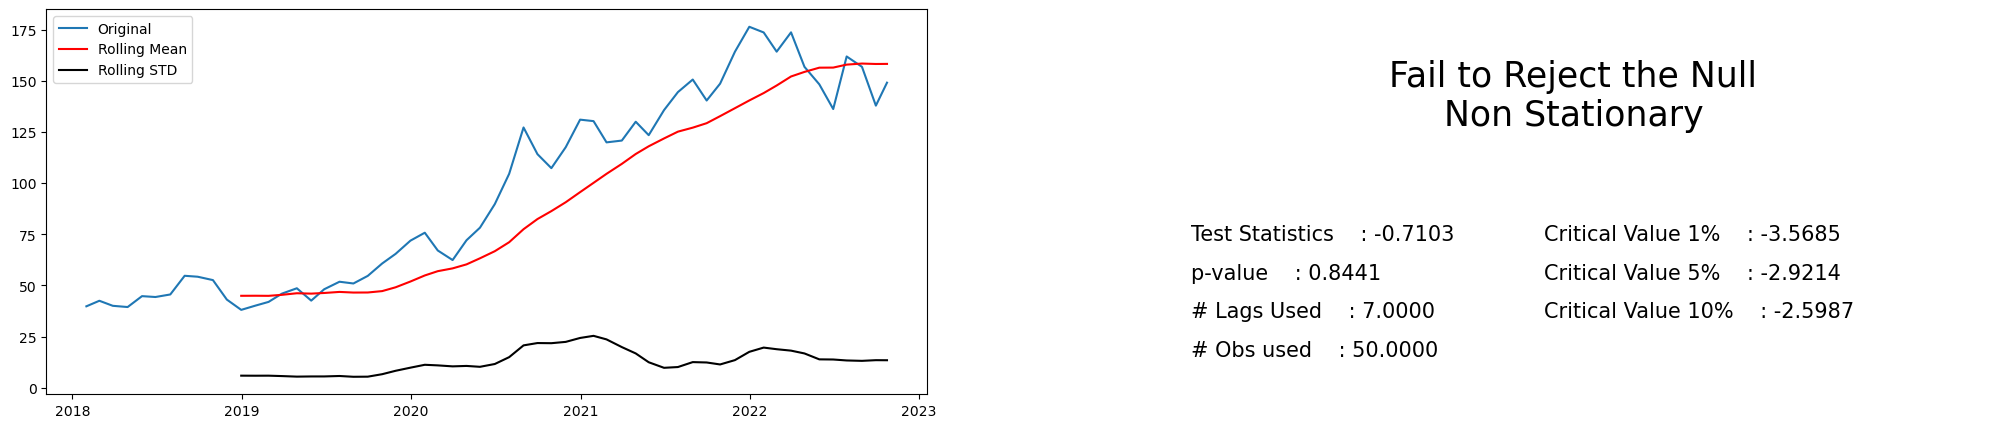

In [208]:
test_stationarity(apple_monthy2018)

In [209]:
ts_log = np.log(apple_monthy2018)

In [210]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [211]:
decomposition = seasonal_decompose(ts_log, period = 12)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

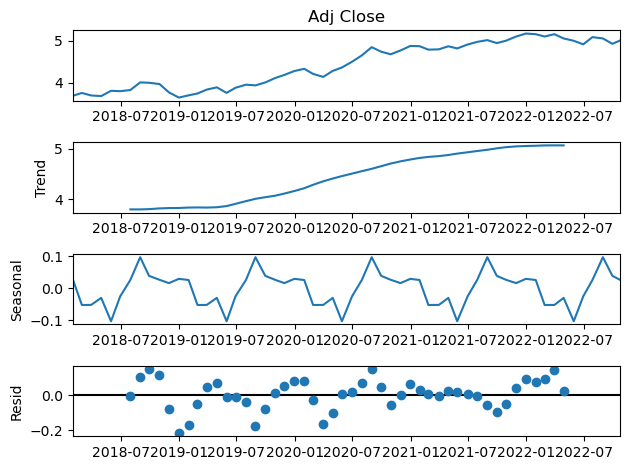

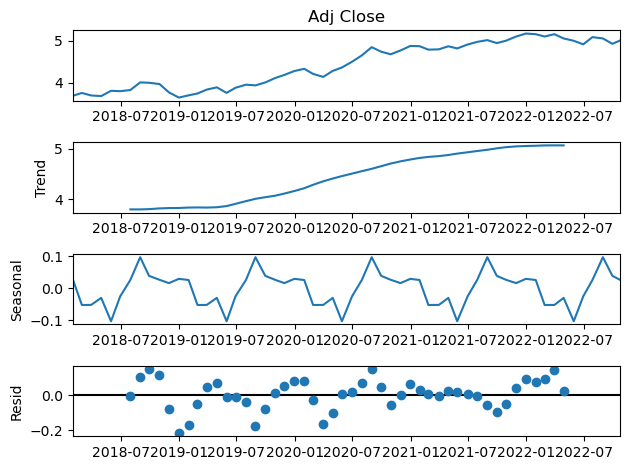

In [212]:
decomposition.plot()

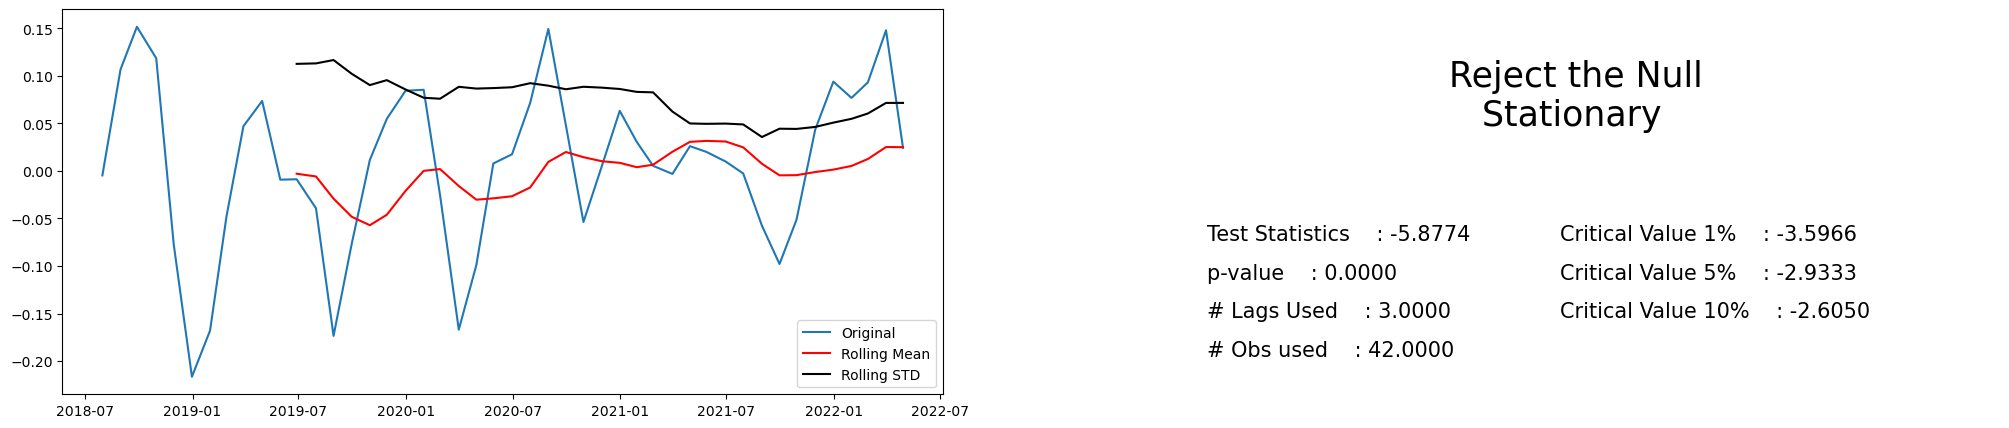

In [213]:
test_stationarity(residual.dropna())

In [214]:
residual.dropna(inplace = True)

In [215]:
from statsmodels.tsa.stattools import acf, pacf

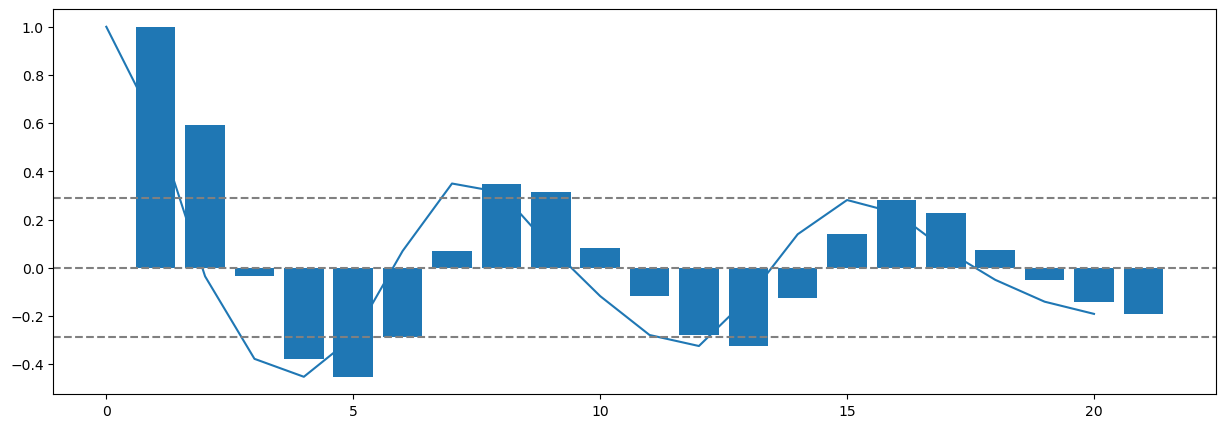

In [216]:
lag_acf = acf(residual, nlags = 20)
plt.figure(figsize = (15,5))
plt.bar(range(1, 22),lag_acf)
plt.plot(lag_acf)
plt.axhline(y = 0, linestyle = '--', color = 'gray')
plt.axhline(y = -1.96/np.sqrt(len(residual)), linestyle = '--', color = 'gray')
plt.axhline(y = 1.96/np.sqrt(len(residual)), linestyle = '--', color = 'gray')
plt.show()

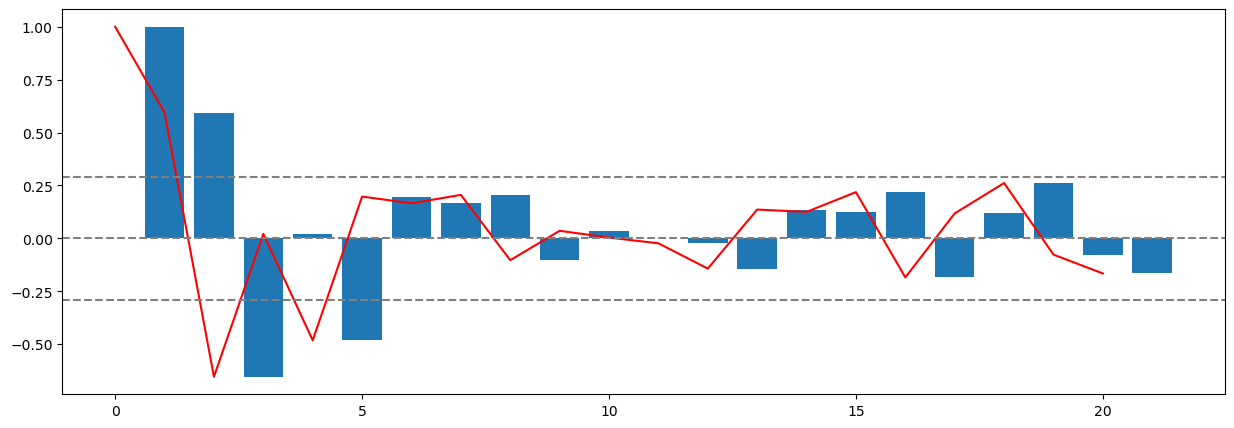

In [217]:
lag_pacf = pacf(residual, nlags = 20, method= 'ols')
plt.figure(figsize = (15,5))
plt.bar(range(1, 22),lag_pacf)
plt.plot(lag_pacf, color = 'red')
plt.axhline(y = 0, linestyle = '--', color = 'gray')
plt.axhline(y = -1.96/np.sqrt(len(residual)), linestyle = '--', color = 'gray')
plt.axhline(y = 1.96/np.sqrt(len(residual)), linestyle = '--', color = 'gray')
plt.show()

In [218]:
from statsmodels.tsa.arima.model import ARIMA

In [220]:
train= apple_monthy2018[:-6]
test = apple_monthy2018[-6:]

In [221]:
len(apple_monthy2018), train.size, test.size

(58, 52, 6)

In [222]:
model = ARIMA(train, order=(4, 2, 2))  
results_ARIMA = model.fit() 
train_pred = results_ARIMA.fittedvalues


C:\Users\saisa\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\saisa\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\saisa\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\saisa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [223]:
test.index

DatetimeIndex(['2022-05-31', '2022-06-30', '2022-07-29', '2022-08-31',
               '2022-09-30', '2022-10-24'],
              dtype='datetime64[ns]', name='Date', freq=None)

In [224]:
forecast = results_ARIMA.forecast(6)

C:\Users\saisa\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


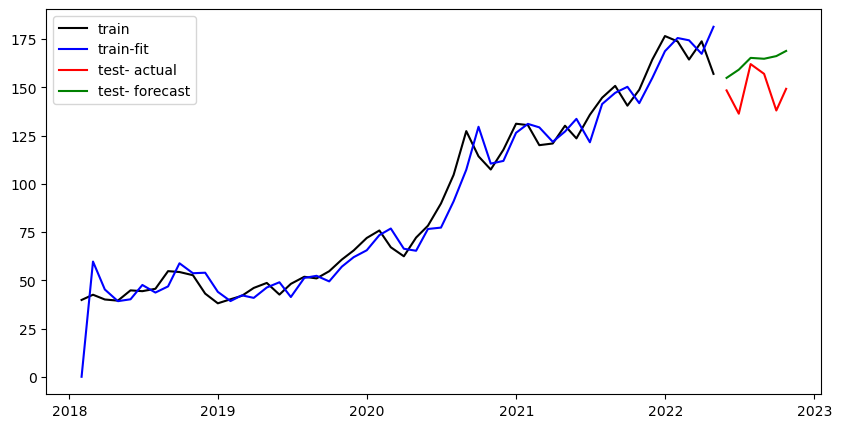

In [225]:
plt.figure(figsize = (10,5))
plt.plot(train, color = 'black', label = 'train')
plt.plot(train_pred, color = 'blue', label = 'train-fit')
plt.plot(test, color = 'red', label = 'test- actual')
plt.plot(test.index, forecast,color = 'green', label = 'test- forecast')
plt.legend()
plt.show()

In [226]:
mean_absolute_percentage_error(y_true = test, y_pred = forecast)

0.10275999179962107

In [231]:
sorted_metrics = collated_data_1.sort_values(['sector', 'Market Cap'], ascending = False)

In [232]:
sector_market_cap = sorted_metrics.groupby('sector').head(2)[['sector','Symbol', 'Market Cap']]

In [233]:
month_end_Data

Date Symbol   Adj Close        YOY       MOM
19     2002-11-29   AAPL    0.235937        NaN       NaN
40     2002-12-31   AAPL    0.218128        NaN -7.548445
61     2003-01-31   AAPL    0.218585        NaN  0.209464
80     2003-02-28   AAPL    0.228479        NaN  4.526399
101    2003-03-31   AAPL    0.215236        NaN -5.796232
...           ...    ...         ...        ...       ...
426678 2022-06-30     ZS  149.509995 -30.801631 -2.338495
426698 2022-07-29     ZS  155.059998 -34.271546  3.712128
426721 2022-08-31     ZS  159.240005 -42.789392  2.695736
426742 2022-09-30     ZS  164.369995 -37.315996  3.221546
426758 2022-10-24     ZS  148.669998 -53.374520 -9.551620

[20383 rows x 5 columns]

In [235]:
trend_data = month_end_Data[month_end_Data.Symbol.isin(sector_market_cap.Symbol)].copy()

In [236]:
trend_data.Symbol.nunique()

14

In [237]:
last_5_start = dt.datetime.today() - rd(years = 5, day = 1)
last_5_start

datetime.datetime(2018, 2, 1, 23, 35, 34, 835184)

In [238]:
data_last_5 = trend_data[trend_data.Date > last_5_start].copy()

data_last_5.Symbol.nunique()

14

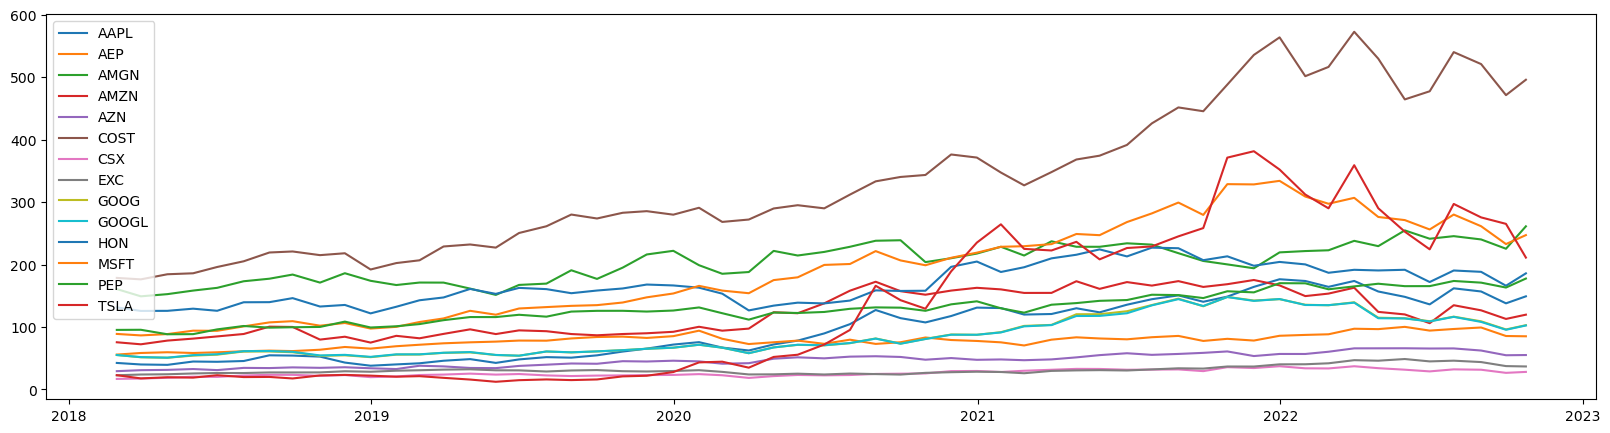

In [239]:
plt.figure(figsize = (20,5))
for comp in data_last_5.Symbol.unique():
  temp_ts = data_last_5.loc[data_last_5.Symbol == comp, ['Date','Adj Close']].set_index('Date').squeeze()
  plt.plot(temp_ts, label = comp)
  plt.legend()
plt.show()

<Figure size 2000x500 with 0 Axes>

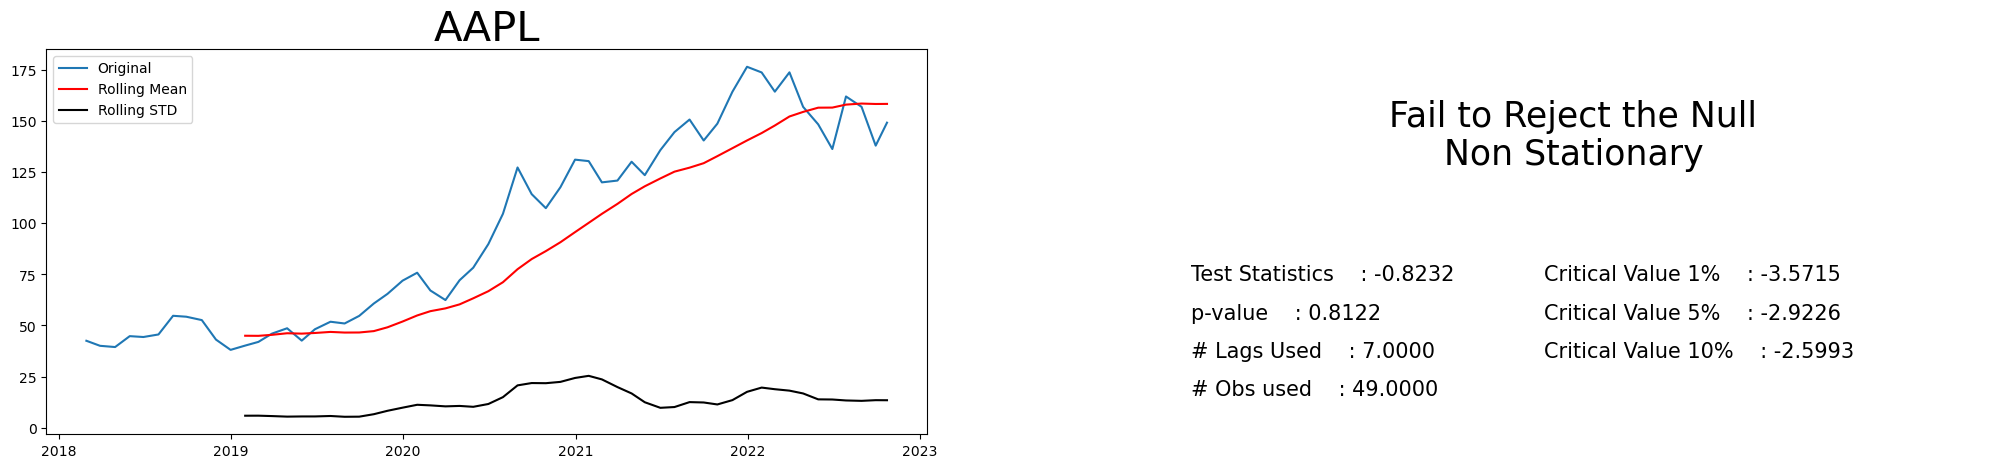

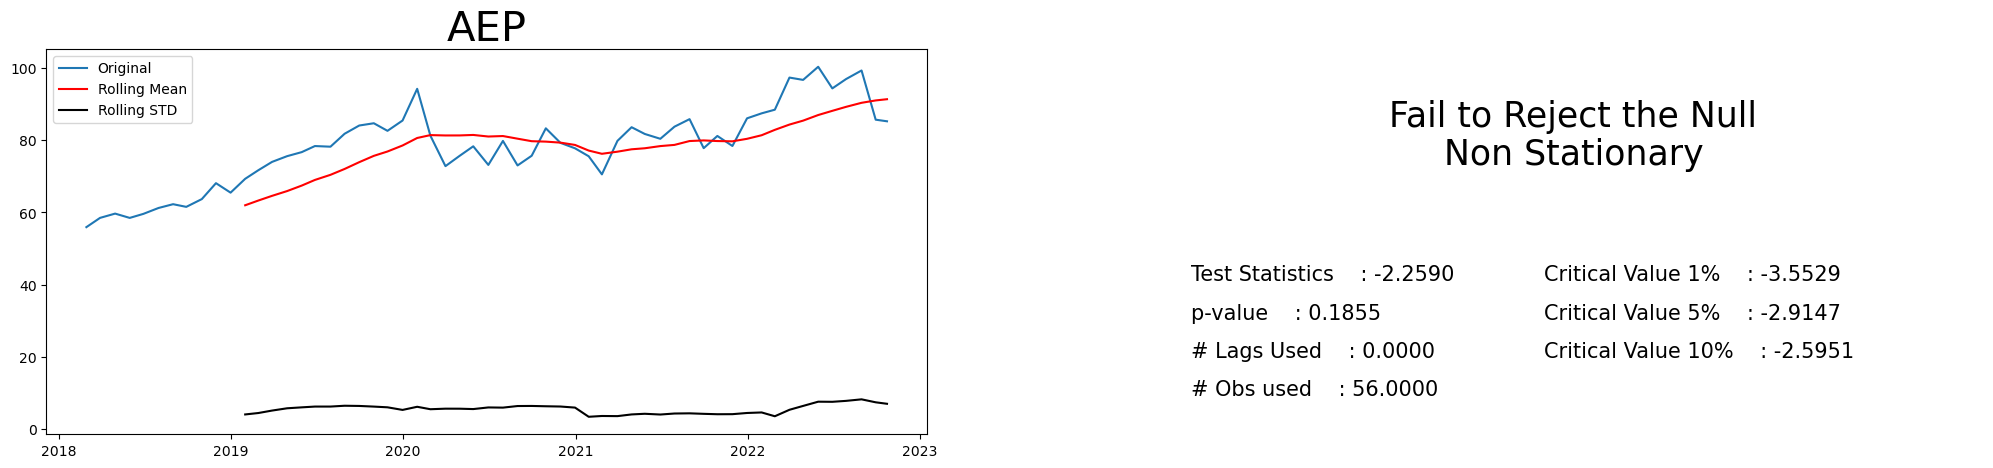

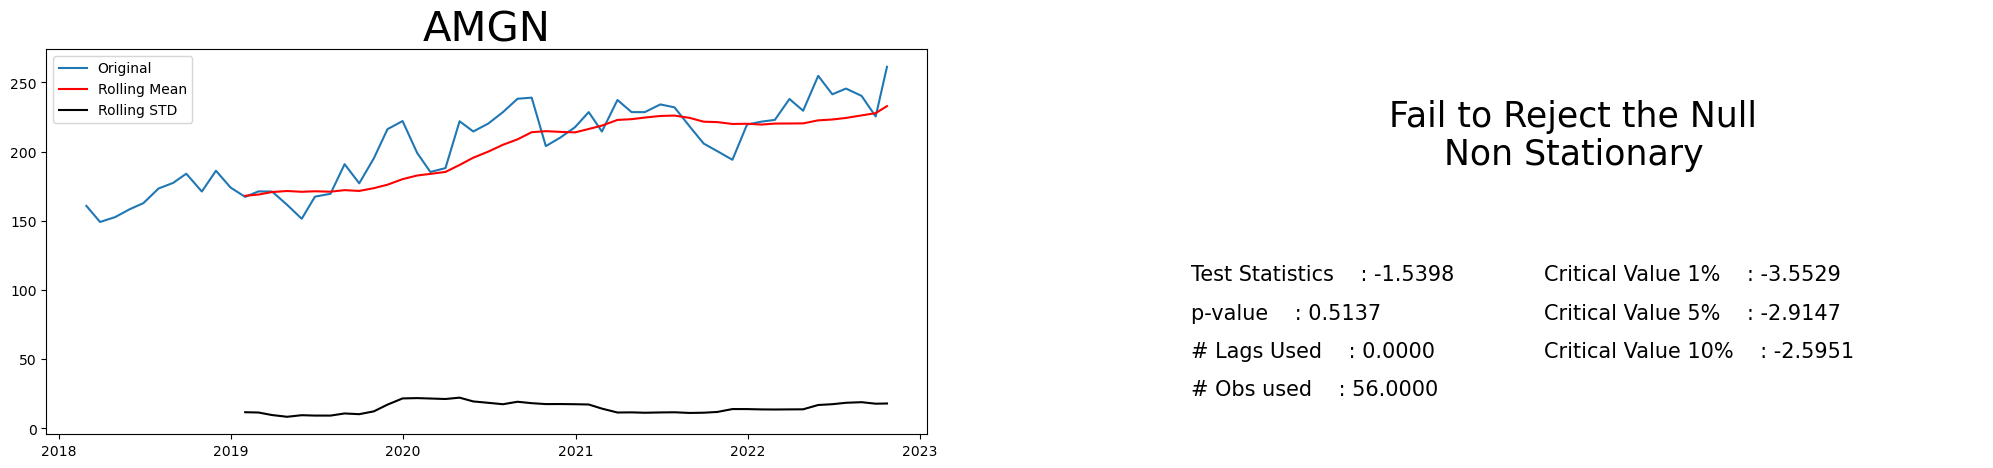

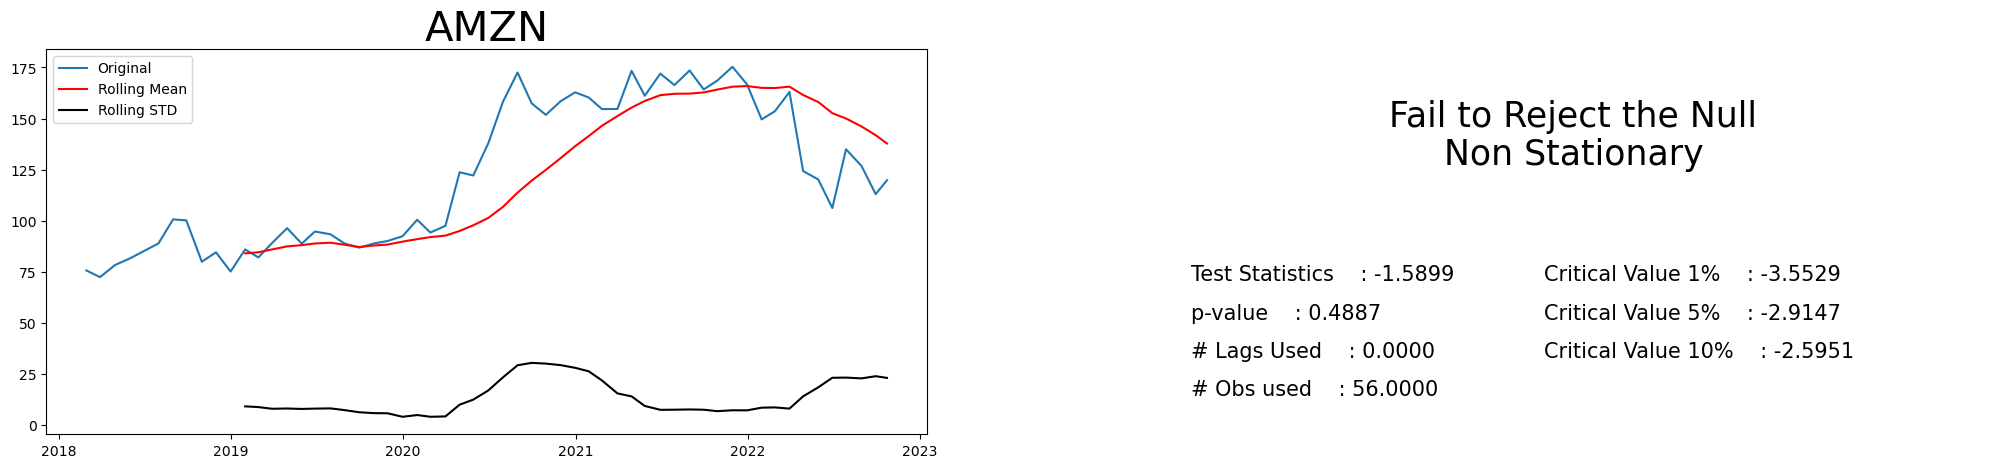

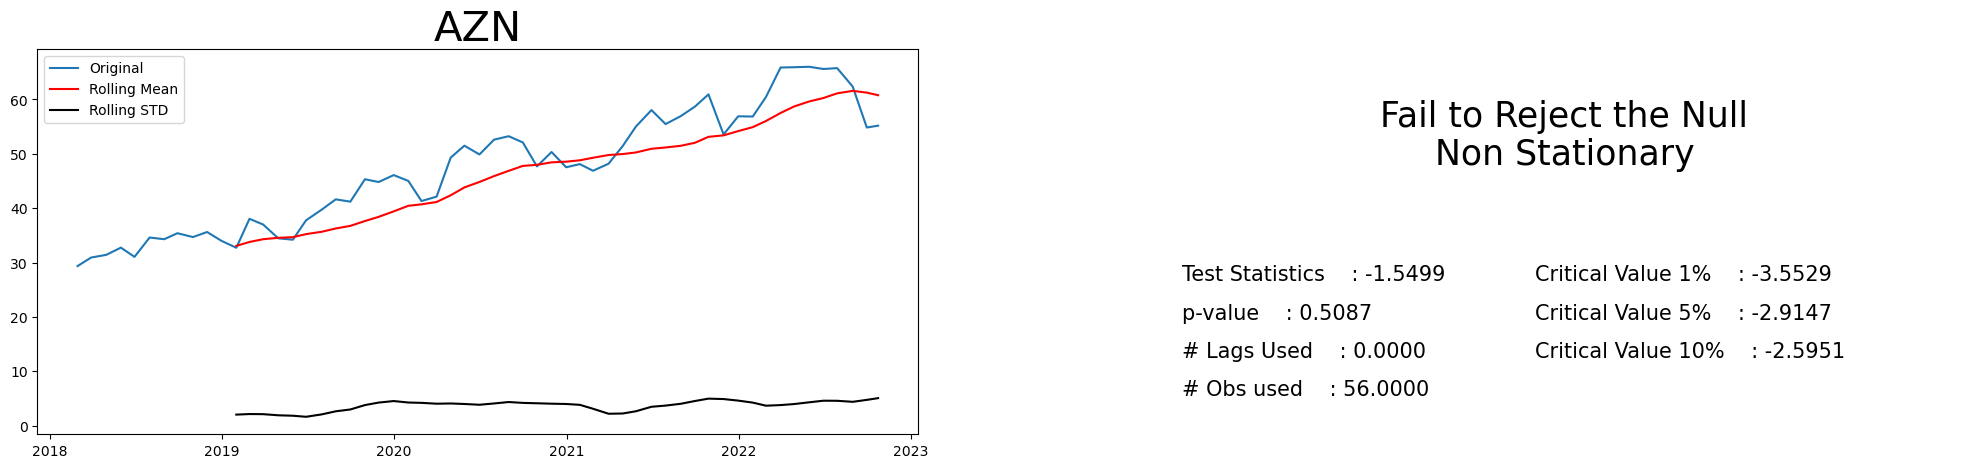

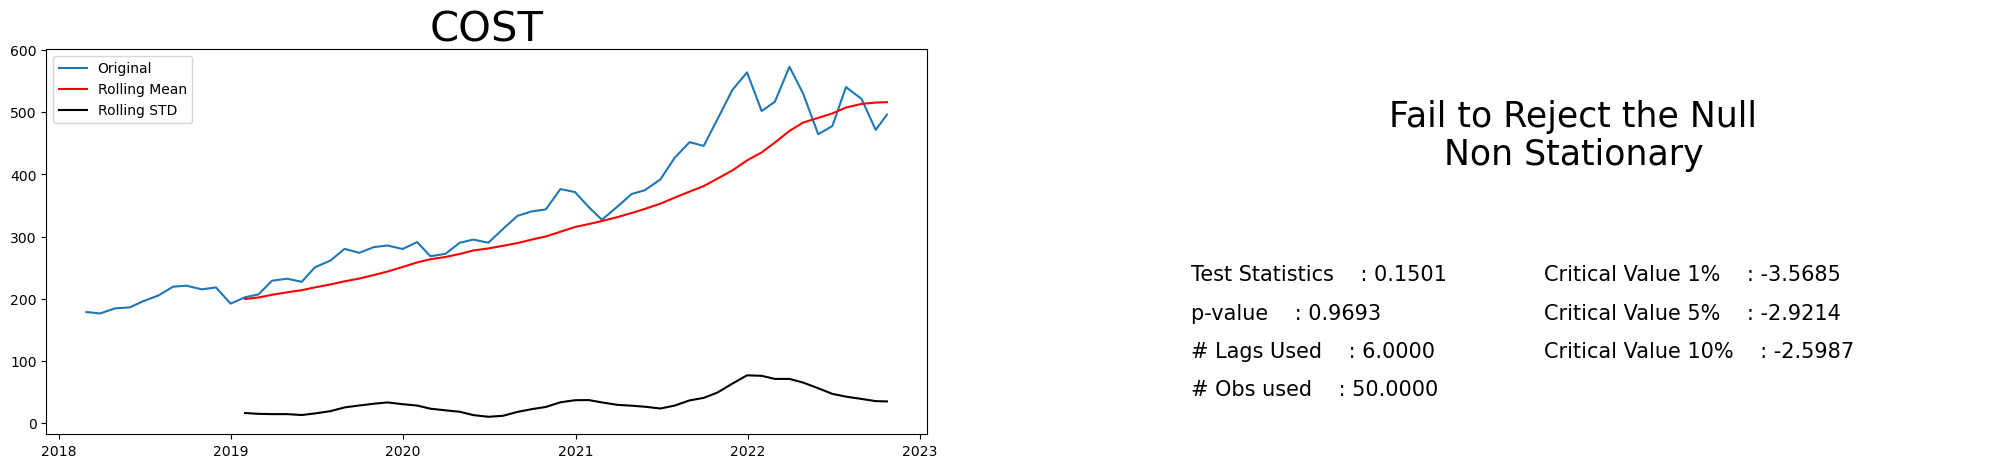

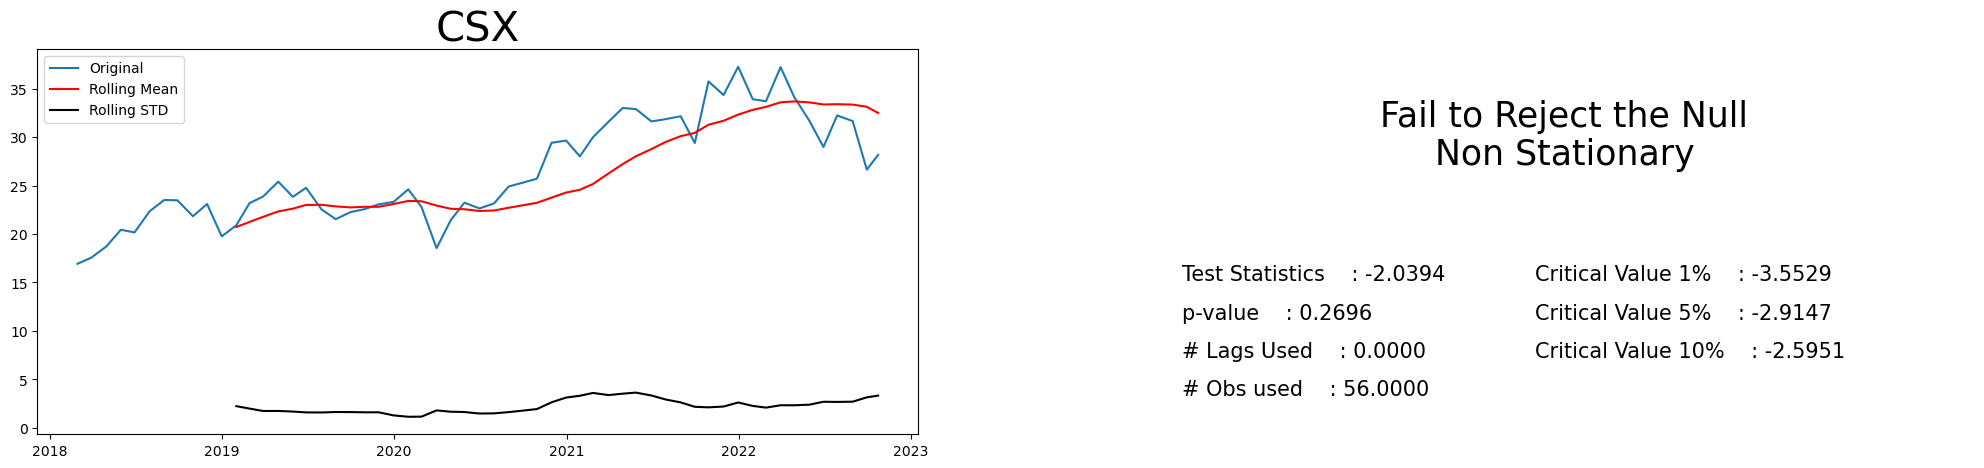

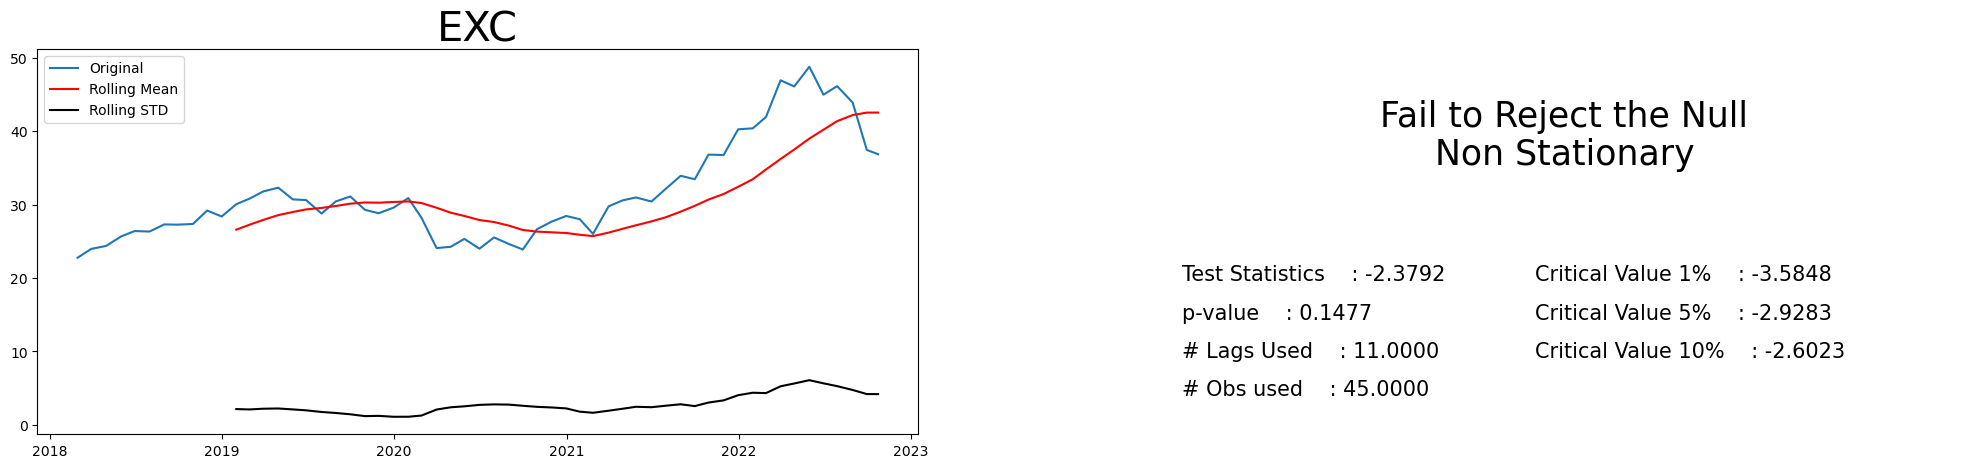

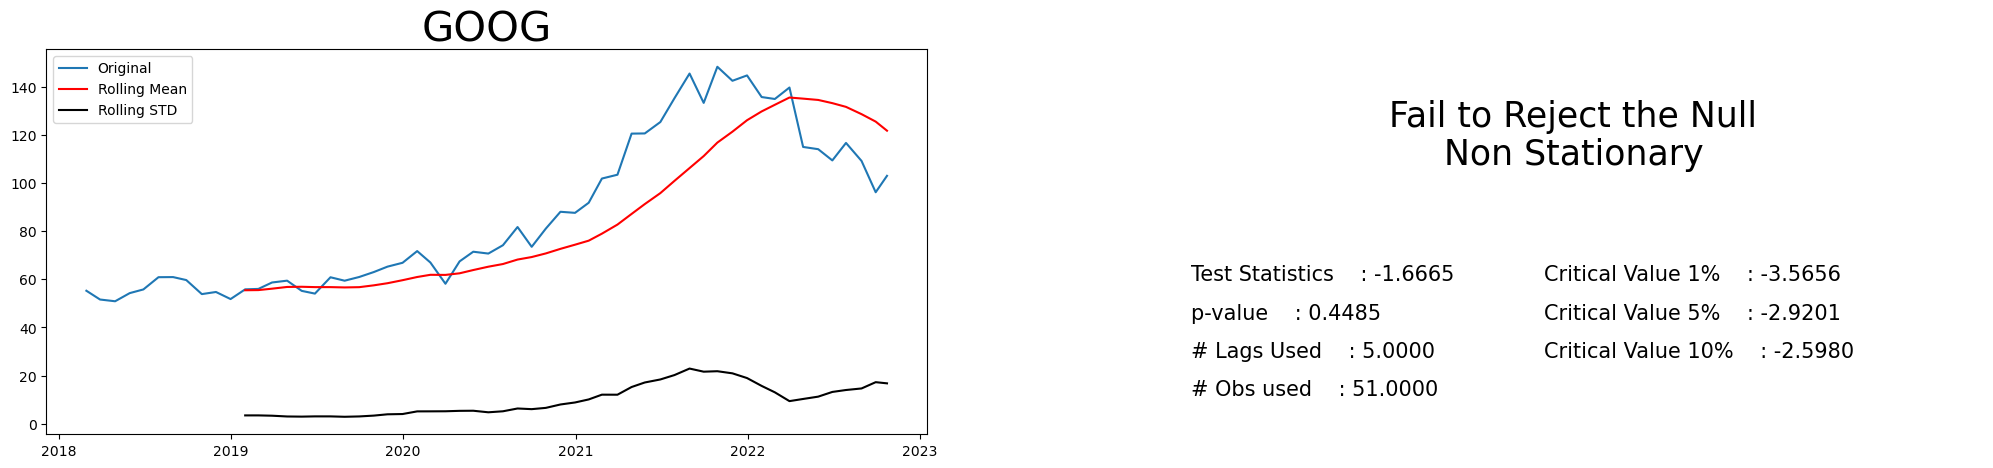

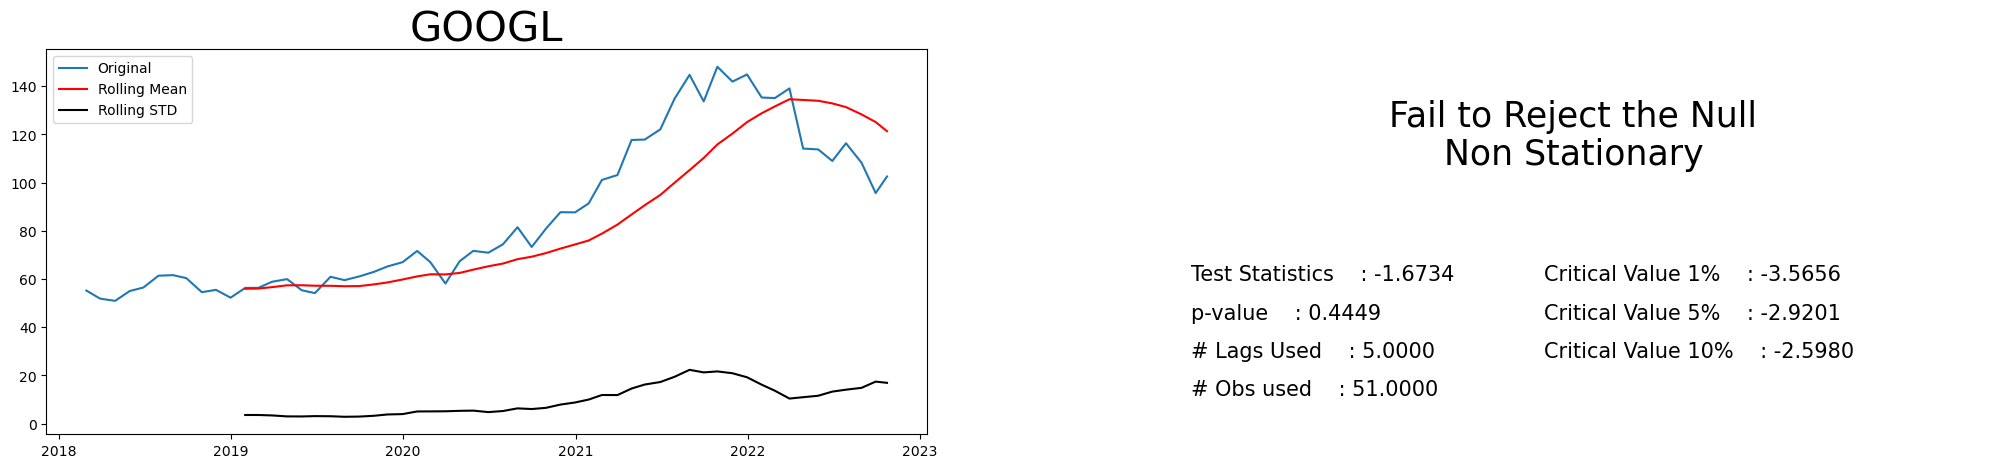

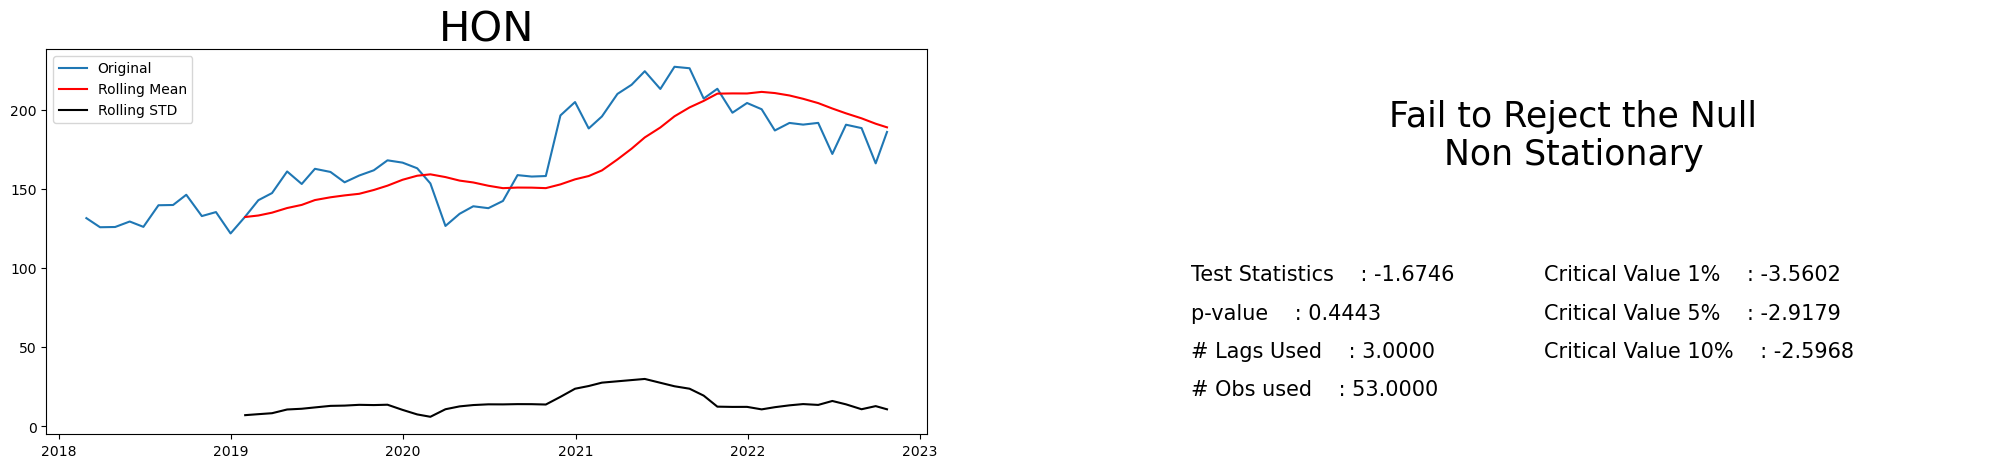

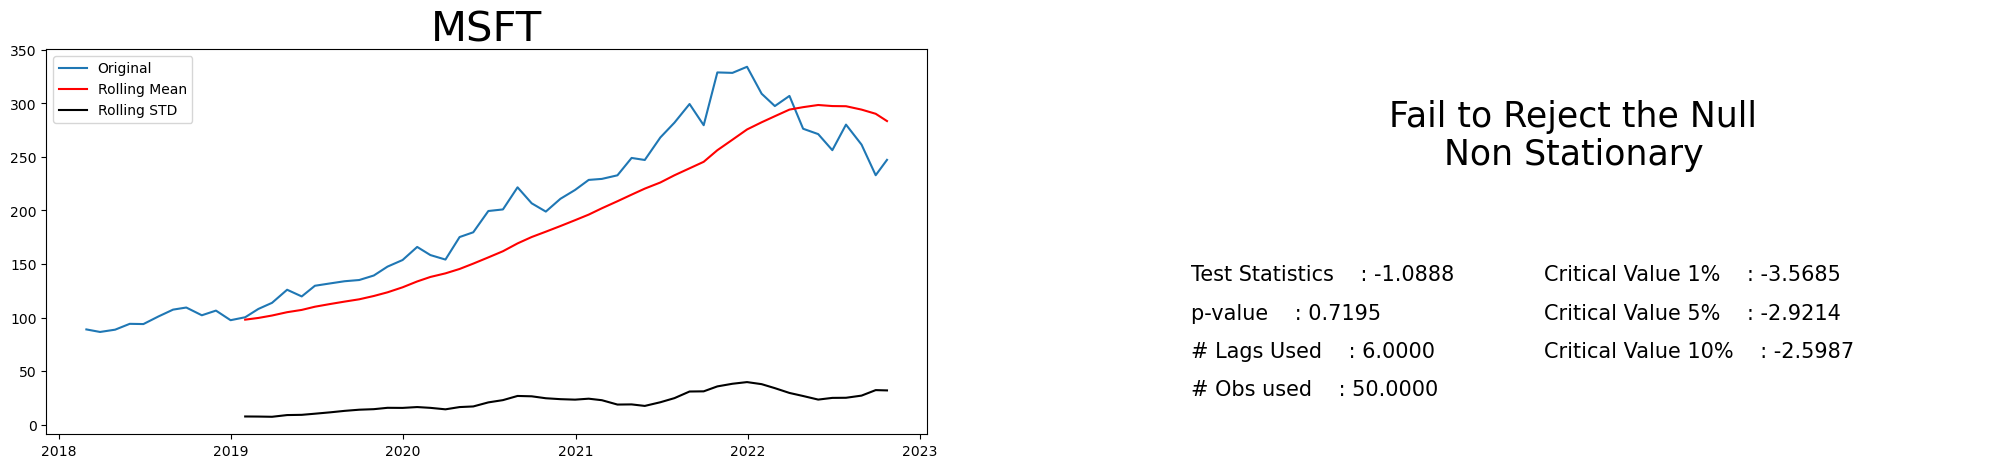

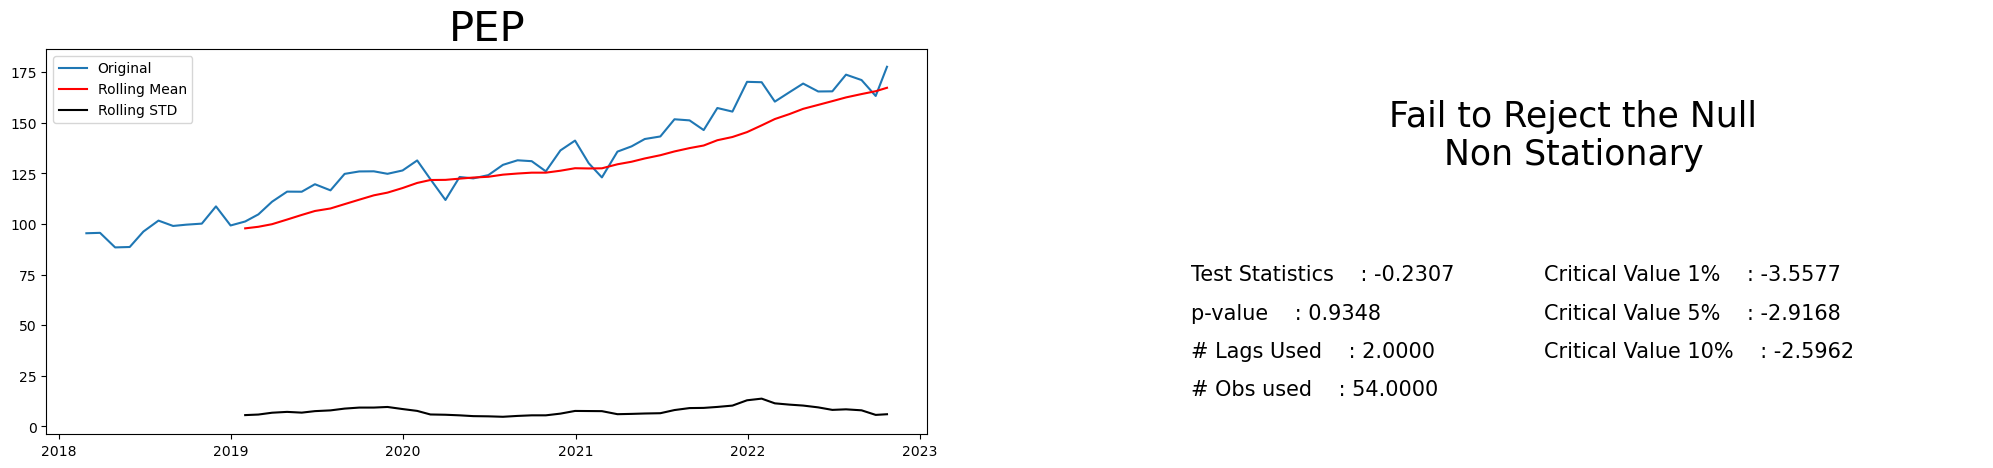

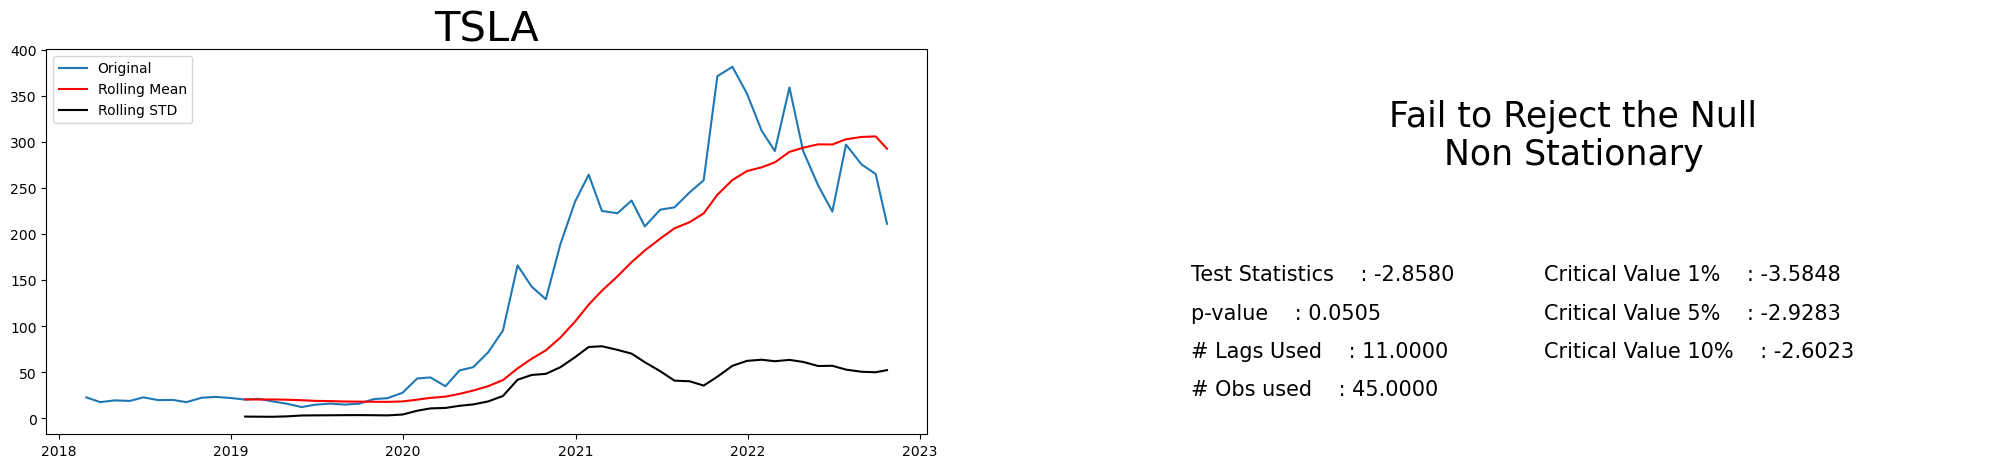

In [245]:
plt.figure(figsize = (20,5))
for comp in data_last_5.Symbol.unique():
  temp_ts = data_last_5.loc[data_last_5.Symbol == comp, ['Date','Adj Close']].set_index('Date').squeeze()
  test_stationarity(temp_ts, comp)

In [246]:
! pip install pmdarima

     -------------------------------------- 572.0/572.0 kB 3.0 MB/s eta 0:00:00


In [252]:
from pmdarima.arima import auto_arima

In [253]:
import warnings
warnings.filterwarnings("ignore")

In [254]:
def auto_arima_foo(ts, company ):
  train = ts[:-12]
  test = ts [-12:]
  model = auto_arima(train, trace = False )
  model.fit(train)
  fit = model.predict_in_sample(train)
  forecast = model.predict(n_periods=len(test))
  mape = mean_absolute_percentage_error(y_true = test, y_pred = forecast )
  print('Best model parameters for {} is {}'.format(company, model ))
  return mape

In [255]:
result = {}
for comp in data_last_5.Symbol.unique():
  temp_ts = data_last_5.loc[data_last_5.Symbol == comp, ['Date','Adj Close']].set_index('Date').squeeze()
  result.update({comp : auto_arima_foo(temp_ts, comp)})

Best model parameters for AAPL is  ARIMA(2,1,2)(0,0,0)[0] intercept
Best model parameters for AEP is  ARIMA(0,1,2)(0,0,0)[0] intercept
Best model parameters for AMGN is  ARIMA(0,1,0)(0,0,0)[0]          
Best model parameters for AMZN is  ARIMA(0,1,0)(0,0,0)[0] intercept
Best model parameters for AZN is  ARIMA(0,1,0)(0,0,0)[0] intercept
Best model parameters for COST is  ARIMA(0,1,0)(0,0,0)[0] intercept
Best model parameters for CSX is  ARIMA(0,1,1)(0,0,0)[0] intercept
Best model parameters for EXC is  ARIMA(1,0,0)(0,0,0)[0] intercept
Best model parameters for GOOG is  ARIMA(5,2,0)(0,0,0)[0]          
Best model parameters for GOOGL is  ARIMA(2,2,1)(0,0,0)[0]          
Best model parameters for HON is  ARIMA(0,1,0)(0,0,0)[0]          
Best model parameters for MSFT is  ARIMA(1,2,1)(0,0,0)[0]          
Best model parameters for PEP is  ARIMA(3,1,3)(0,0,0)[0] intercept
Best model parameters for TSLA is  ARIMA(0,2,1)(0,0,0)[0]          


In [251]:
result

{'AAPL': 0.12147825991895506,
 'AEP': 0.07595001744957128,
 'AMGN': 0.14019654107330873,
 'AMZN': 0.36842013241066734,
 'AZN': 0.09105692652164325,
 'COST': 0.08601412271415936,
 'CSX': 0.16126208550961338,
 'EXC': 0.18656145447940178,
 'GOOG': 0.4922497010739866,
 'GOOGL': 0.559237625723075,
 'HON': 0.13248488401394368,
 'MSFT': 0.3499589791664876,
 'PEP': 0.03369330428731997,
 'TSLA': 0.7865522582710267}